In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

2024-01-22 15:53:58,782 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (463, 14)


In [2]:
dataset_name = "W25_only"
BES_Panel = pd.read_stata(BES_data_folder+dataset_name+os.sep+"BES2019_W25_v25.0.dta")

In [3]:
#### get factors - PCA/FA

In [4]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

Wall time: 18.5 s


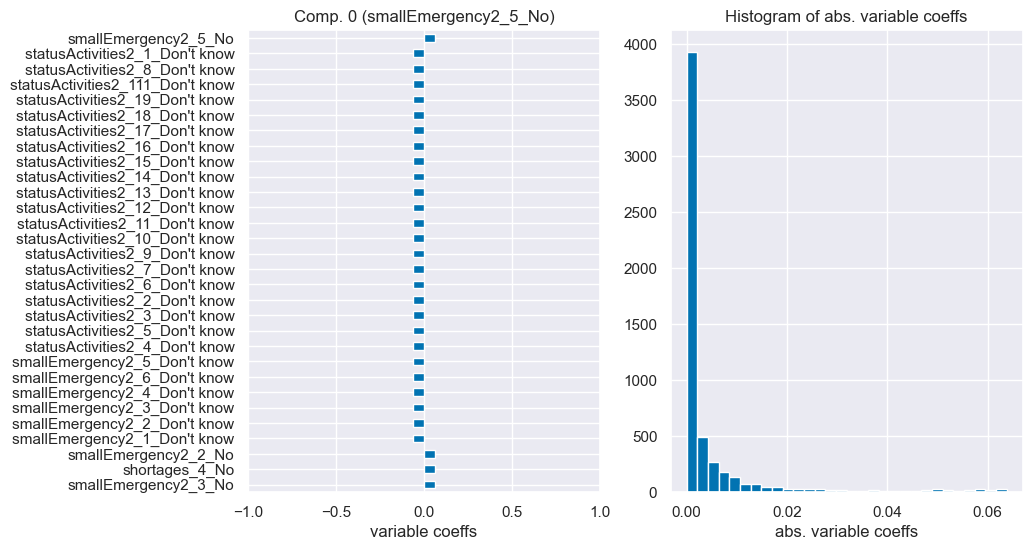

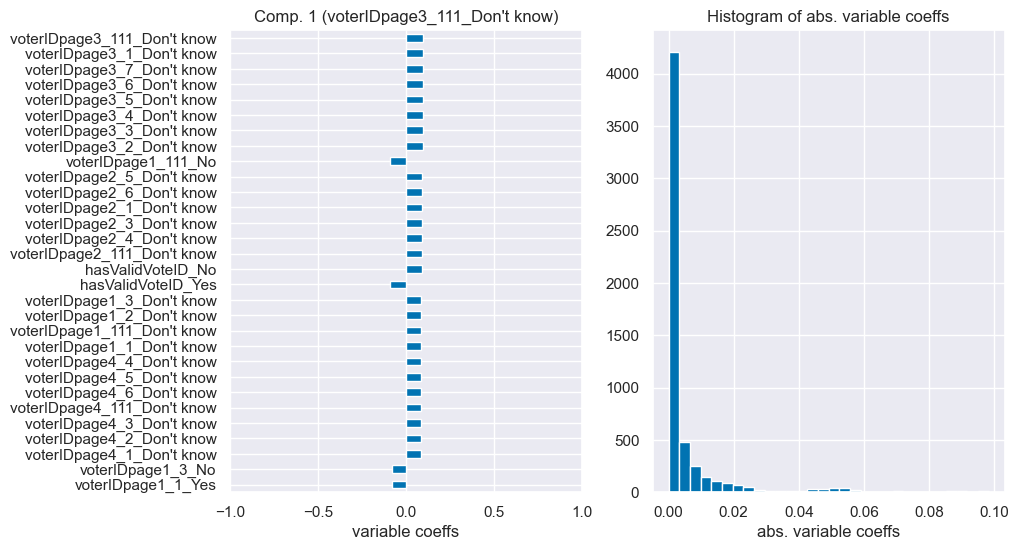

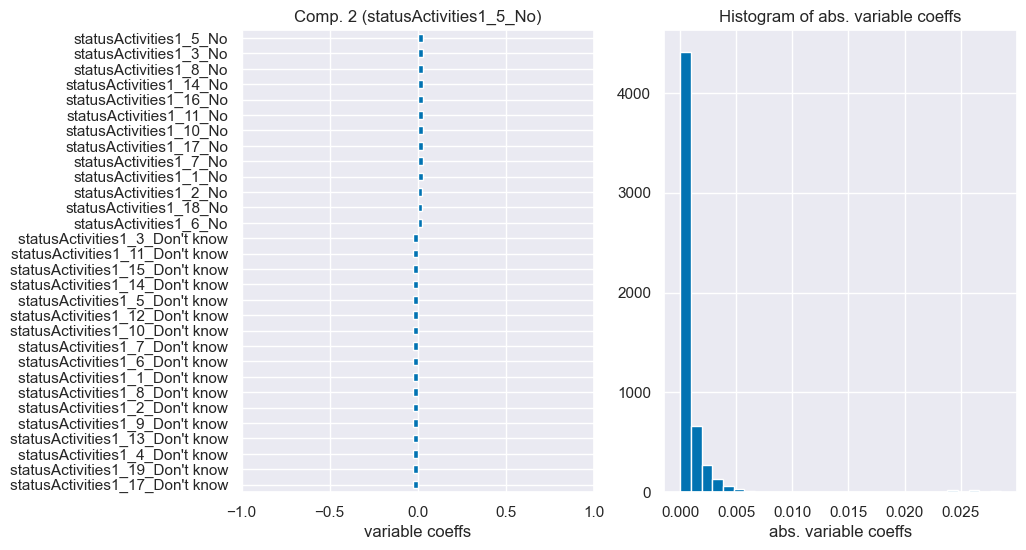

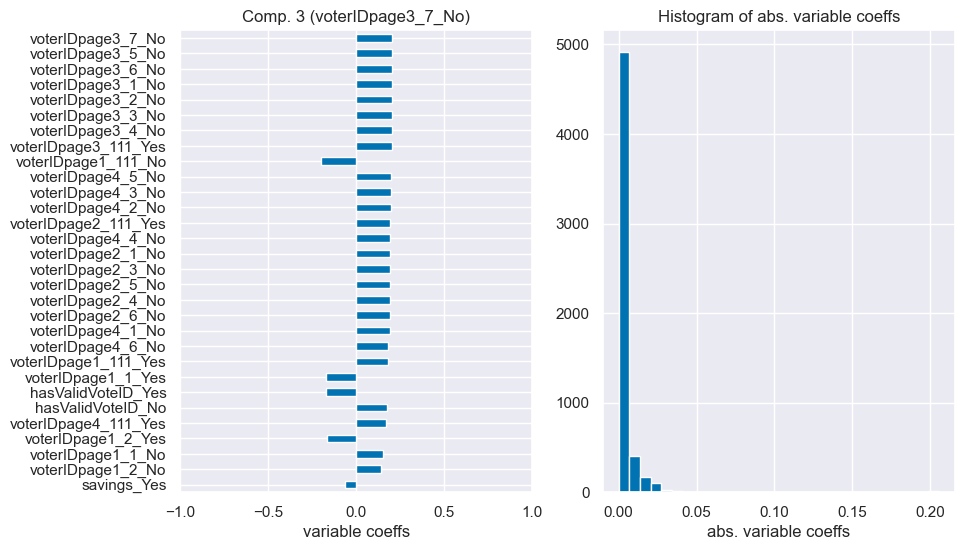

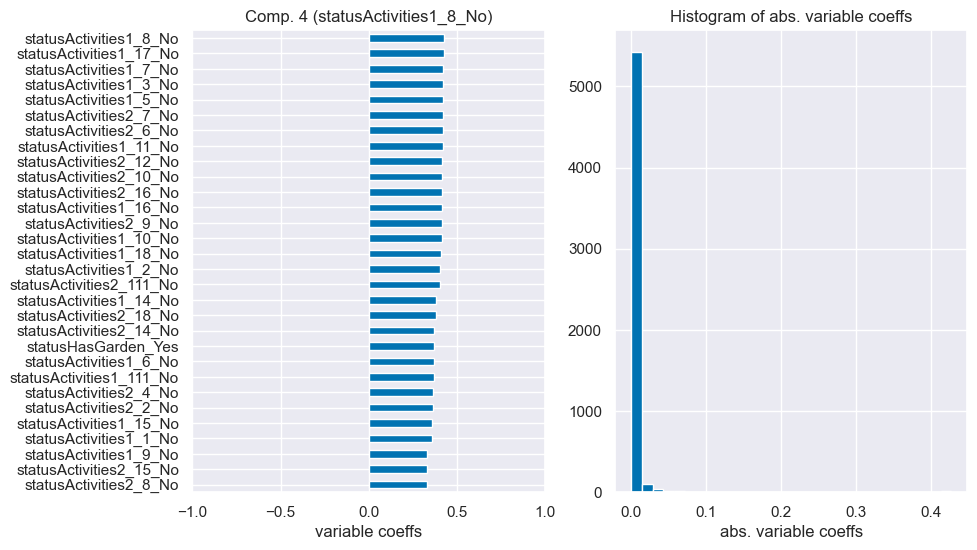

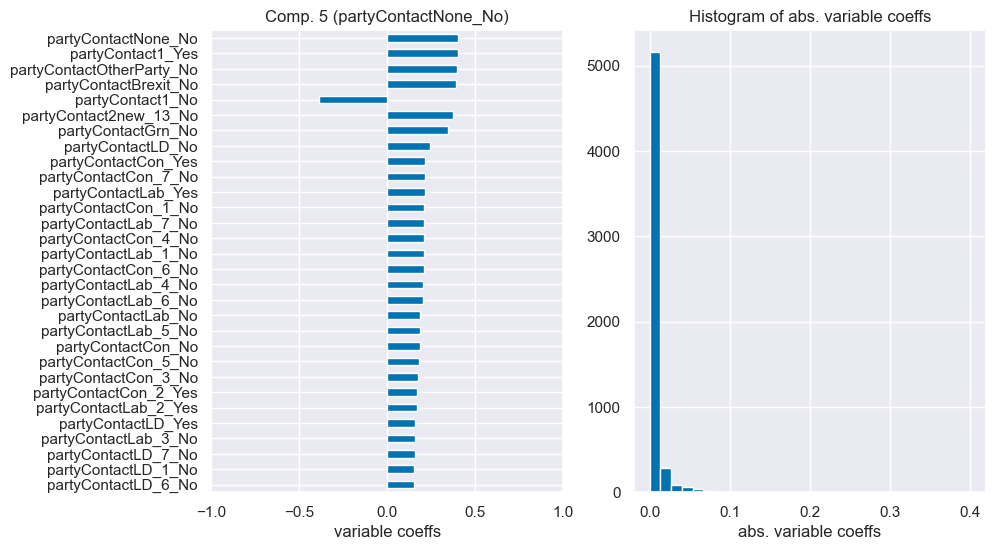

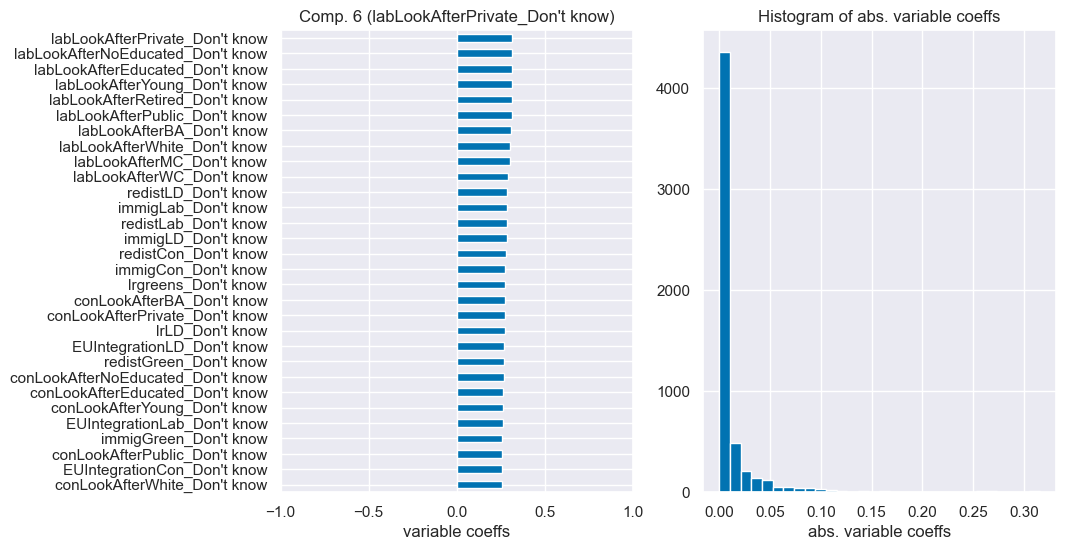

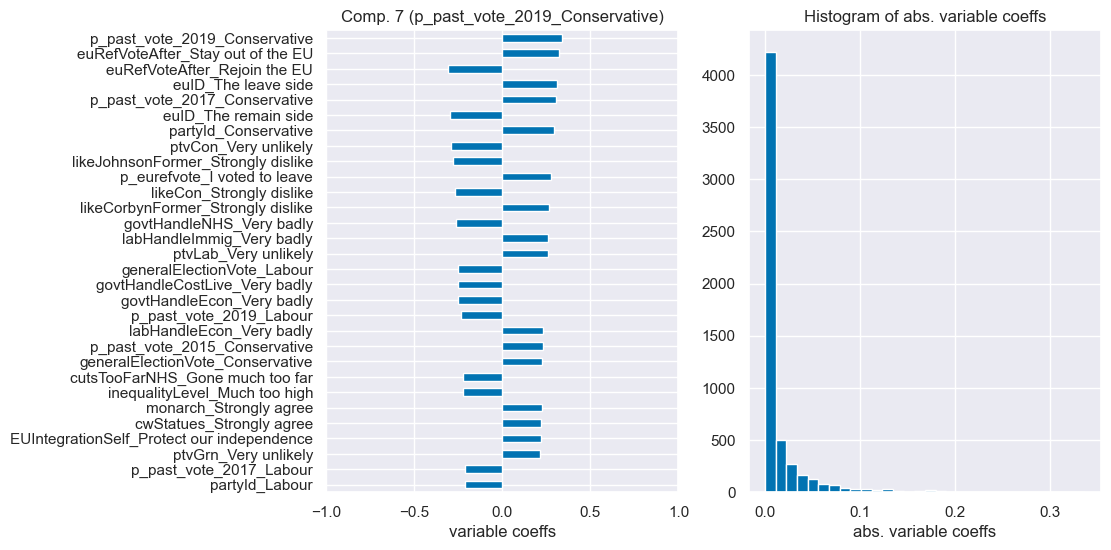

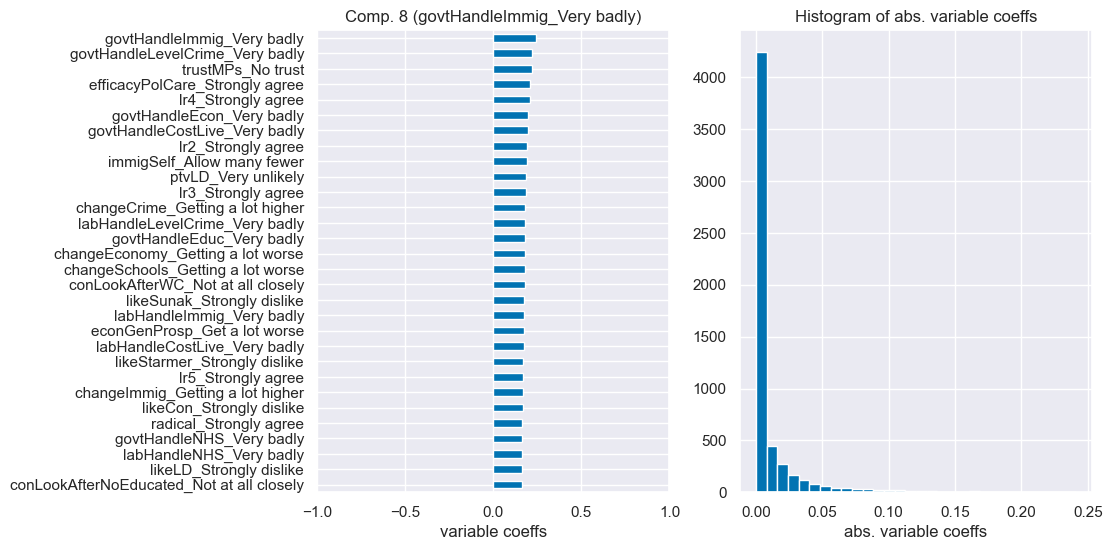

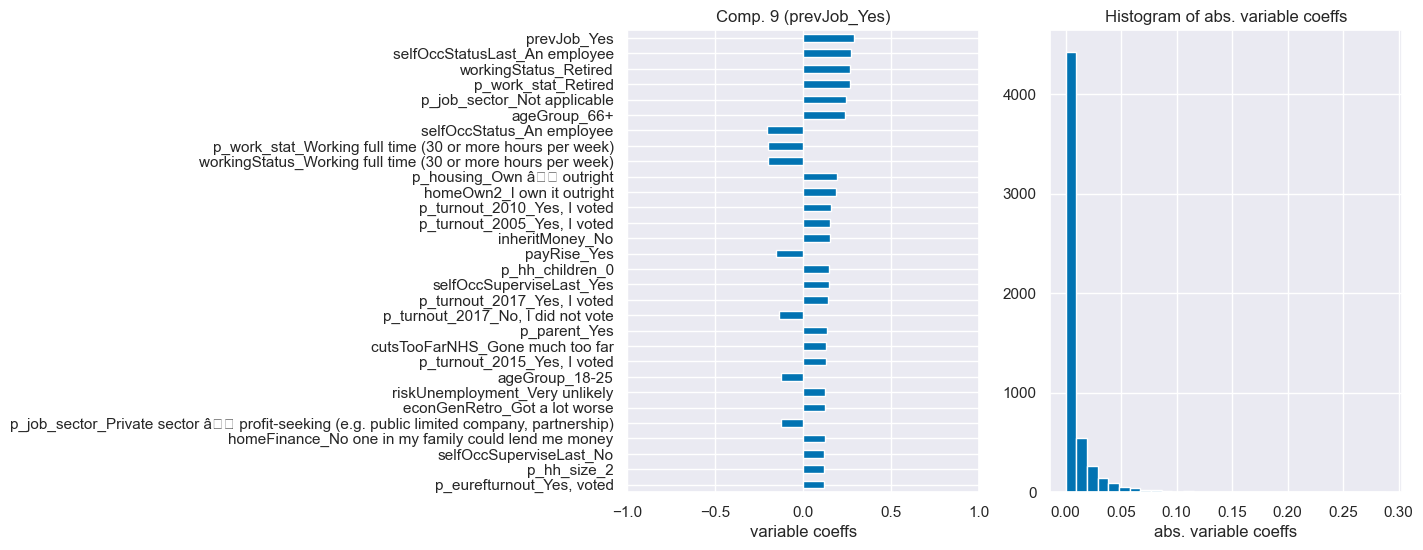

In [5]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 58.6 s


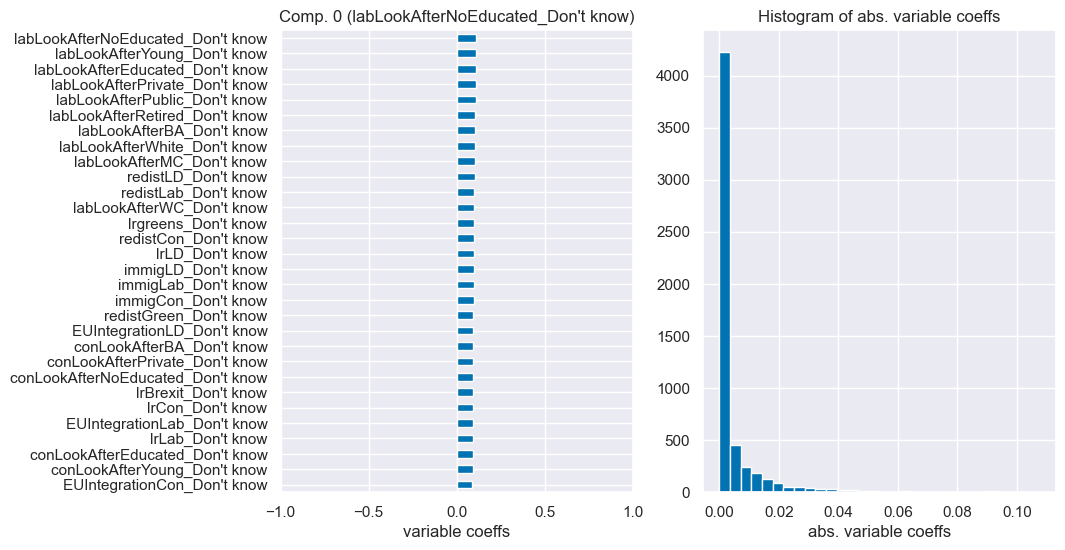

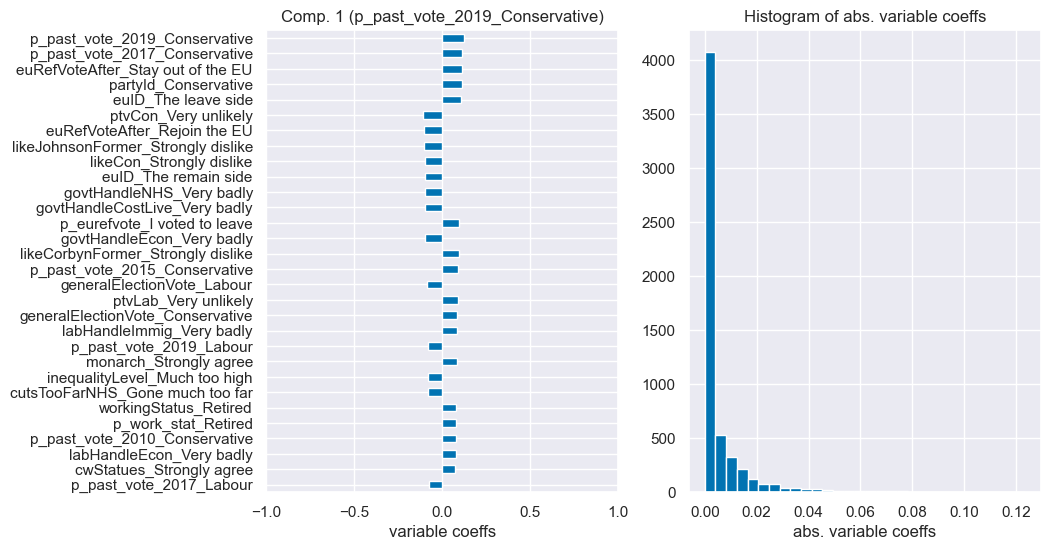

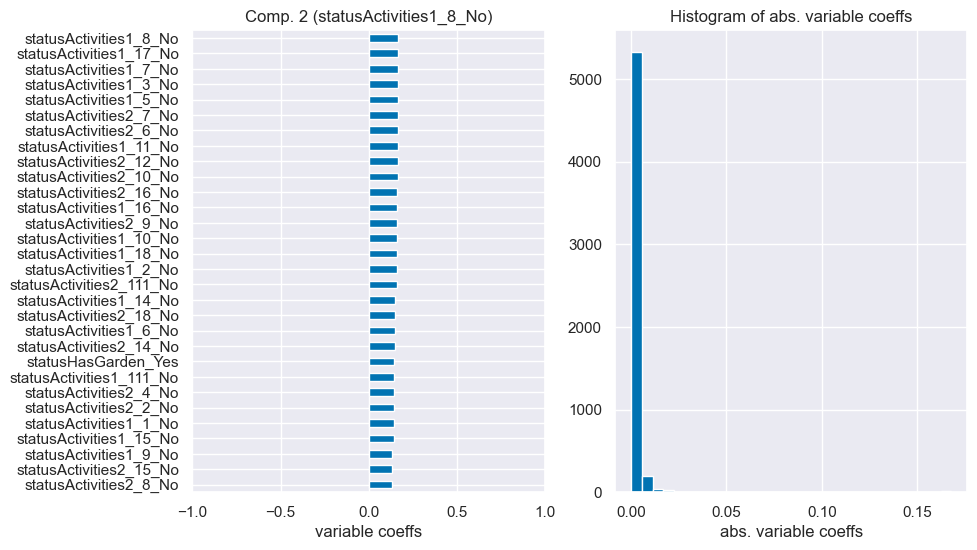

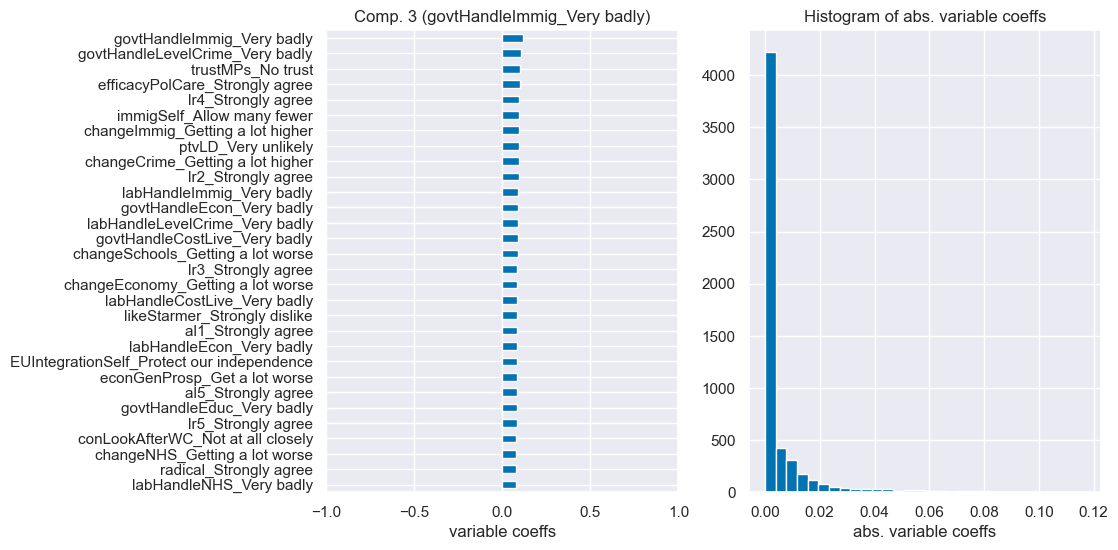

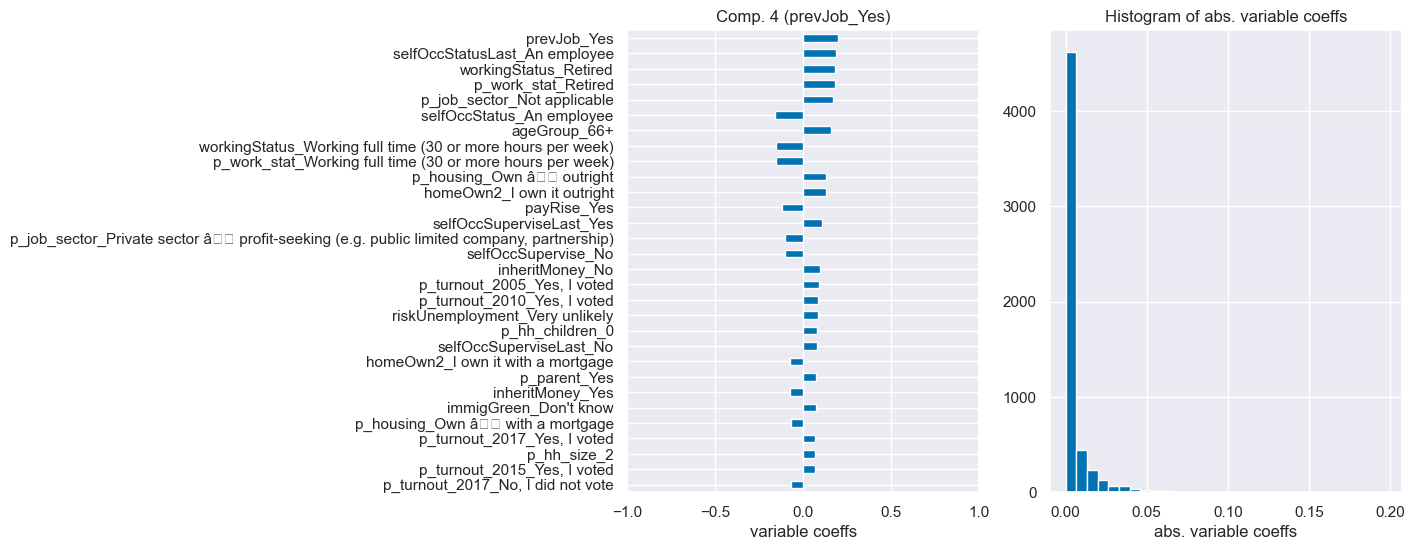

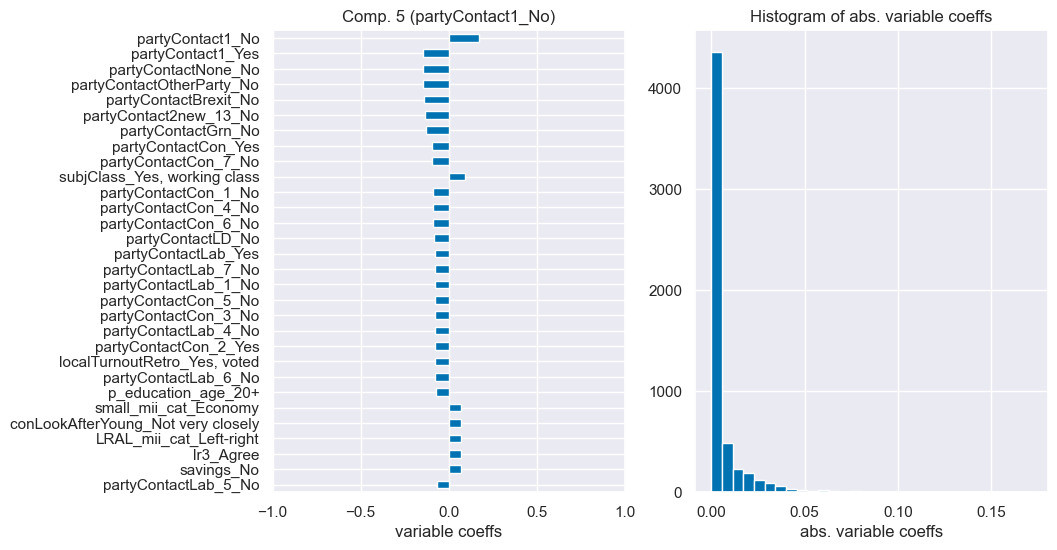

In [6]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [7]:
# W25
# partnerOcc variables
# some welsh/private school variables with W1_/anyUniW21W22W23
# statusArea(Edu|Spaces|Shops|Crime|Spirit) - local area stuff + which supermarket!
# statusActivities_1/_2 - big binary list of activities you have participated in (look like a mix of high/low status?)
# environ<thing> - which should the govt spend more/less of its environment budget on?
# defenceSpend<thing> - same but def budget

# payRise/payRiseAmount

# inequalityLevel diff between rich and poor ppl too high-about right-too low

# discrimGay/Trans added to discrim list
# integrtity/competentSunak added to list

# cw<thing> - agree-disagree for Culture War statements

# <party>LookAfter(Public|Private) sector added to list
# (govt|lab)HandlePollution Air and water pollution added to list

# voteMethodb|askedForID|attemptTurnout|reasonForTurnaway|reasonNonVoter - how did you vote in locals|asked for id|tried to vote|tried to vote but turned away why/didn't vote why
# mayoral election choices
# goodConductLocals conducted fairly-unfairly
# voterID bunch of variables about voterID in local elections

# pubPrivEfficient|nationalize<thing> - public vs private section/nationalisation
# likeYousaf|likeCorbynFormer|SturgeonFormer


# changeSchools - doesn't appear in document????

In [8]:
BES_Panel["payRise"].value_counts()

Yes           9408
No            5282
Don't know     443
Name: payRise, dtype: int64

In [9]:
BES_Panel["payRiseAmount"].cat.categories

Index(['Less than 2%', 'Between 2% and 5%', 'Between 6 and 10%', 'Over 10%',
       'Donât know'],
      dtype='object')

In [10]:
BES_Panel["payRiseAmount"].replace('Donât know',np.nan)\
                                .value_counts(dropna=False)

NaN                  22019
Between 2% and 5%     4523
Less than 2%          1674
Between 6 and 10%     1671
Over 10%               520
Name: payRiseAmount, dtype: int64

In [11]:
BES_Panel["payRiseAmountIncZero"] = BES_Panel["payRiseAmount"].replace('Donât know',np.nan)\
    .cat.set_categories(['No payrise','Less than 2%', 'Between 2% and 5%', 'Between 6 and 10%', 'Over 10%'],ordered=True)
BES_Panel.loc[BES_Panel["payRise"]=="No","payRiseAmountIncZero"] = "No payrise"
BES_Panel["payRiseAmountIncZero"]

0                      NaN
1                      NaN
2                      NaN
3        Between 2% and 5%
4                      NaN
               ...        
30402                  NaN
30403                  NaN
30404                  NaN
30405                  NaN
30406                  NaN
Name: payRiseAmountIncZero, Length: 30407, dtype: category
Categories (5, object): ['No payrise' < 'Less than 2%' < 'Between 2% and 5%' < 'Between 6 and 10%' < 'Over 10%']

Top 20 positive (spearman) correlations for payRiseAmountIncZero r p N 
 
 selfOccStatus_An employee 
 0.280000 
 0.00 
 11510 
 
 
 sector_Private sector firm of company Including,[...] 
 0.170000 
 0.00 
 11510 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 0.170000 
 0.00 
 11510 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 0.170000 
 0.00 
 11510 
 
 
 savings_Yes 
 0.150000 
 0.00 
 11510 
 
 
 inheritMoney_Yes 
 0.140000 
 0.00 
 11510 
 
 
 selfOccSupervise_Yes 
 0.140000 
 0.00 
 11510 
 
 
 smallEmergency2_1_Yes 
 0.130000 
 0.00 
 11510 
 
 
 selfOccOrgSize_500 or more employees 
 0.130000 
 0.00 
 11510 
 
 
 riskPoverty_Very unlikely 
 0.120000 
 0.00 
 11510 
 
 
 selfOccOrgSize_25 to 499 employees 
 0.120000 
 0.00 
 11510 
 
 
 smallEmergency2_5_No 
 0.110000 
 0.00 
 11510 
 
 
 inheritChangeCircs_Yes 
 0.110000 
 0.00 
 11510 
 
 
 econPersonalRetro_Got a little better 
 0.110000 
 0.00 
 11510 
 
 
 voterIDpage1_2_Yes 
 0.090000 
 0.00 
 11510 
 
 
 econPersonalRetro_Got a lot better 
 0.090000 
 0.00 
 11510 
 
 
 riskUnemployment_Fairly unlikely 
 0.090000 
 0.00 
 11510 
 
 
 homeOwn2_I own it with a mortgage 
 0.080000 
 0.00 
 11510 
 
 
 smallEmergency2_3_No 
 0.080000 
 0.00 
 11510 
 
 
 worryEconSecurity_3 
 0.080000 
 0.00 
 11510 
 
 Top 20 negative (spearman) correlations for payRiseAmountIncZero r p N 
 
 selfOccStatus_Self-employed/independent contractor 
 -0.280000 
 0.00 
 11510 
 
 
 selfOccEmployees_I do not have employees 
 -0.270000 
 0.00 
 11510 
 
 
 sector_Self-employed 
 -0.210000 
 0.00 
 11510 
 
 
 ns_sec_analytic_Employers in small organisations[...] 
 -0.190000 
 0.00 
 11510 
 
 
 ns_sec_L9.1 Own account workers (non-professional) 
 -0.170000 
 0.00 
 11510 
 
 
 workingStatus_Working part time (8-29 hours per[...] 
 -0.130000 
 0.00 
 11510 
 
 
 inheritMoney_No 
 -0.130000 
 0.00 
 11510 
 
 
 savings_No 
 -0.130000 
 0.00 
 11510 
 
 
 workingStatus_Working part time (less than 8 hours[...] 
 -0.120000 
 0.00 
 11510 
 
 
 ns_sec_L4.3 Traditional self-employed 
 -0.120000 
 0.00 
 11510 
 
 
 p_job_sector_Not applicable 
 -0.120000 
 0.00 
 11510 
 
 
 smallEmergency2_1_No 
 -0.110000 
 0.00 
 11510 
 
 
 p_work_stat_Working part time (8-29 hours a week) 
 -0.110000 
 0.00 
 11510 
 
 
 econPersonalRetro_Got a lot worse 
 -0.110000 
 0.00 
 11510 
 
 
 p_work_stat_Working part time (Less than 8 hours a[...] 
 -0.110000 
 0.00 
 11510 
 
 
 econPersonalProsp_Get a lot worse 
 -0.110000 
 0.00 
 11510 
 
 
 homeFinance_No one in my family could lend me[...] 
 -0.100000 
 0.00 
 11510 
 
 
 p_gross_personal_Â under Â£5,000 per year 
 -0.090000 
 0.00 
 11510 
 
 
 riskUnemployment_Fairly likely 
 -0.090000 
 0.00 
 11510 
 
 
 EconSecurityFuture_A lot worse 
 -0.090000 
 0.00 
 11510

MSE: 1.20, MAE: 0.91, EV: 0.17, R2: 0.17


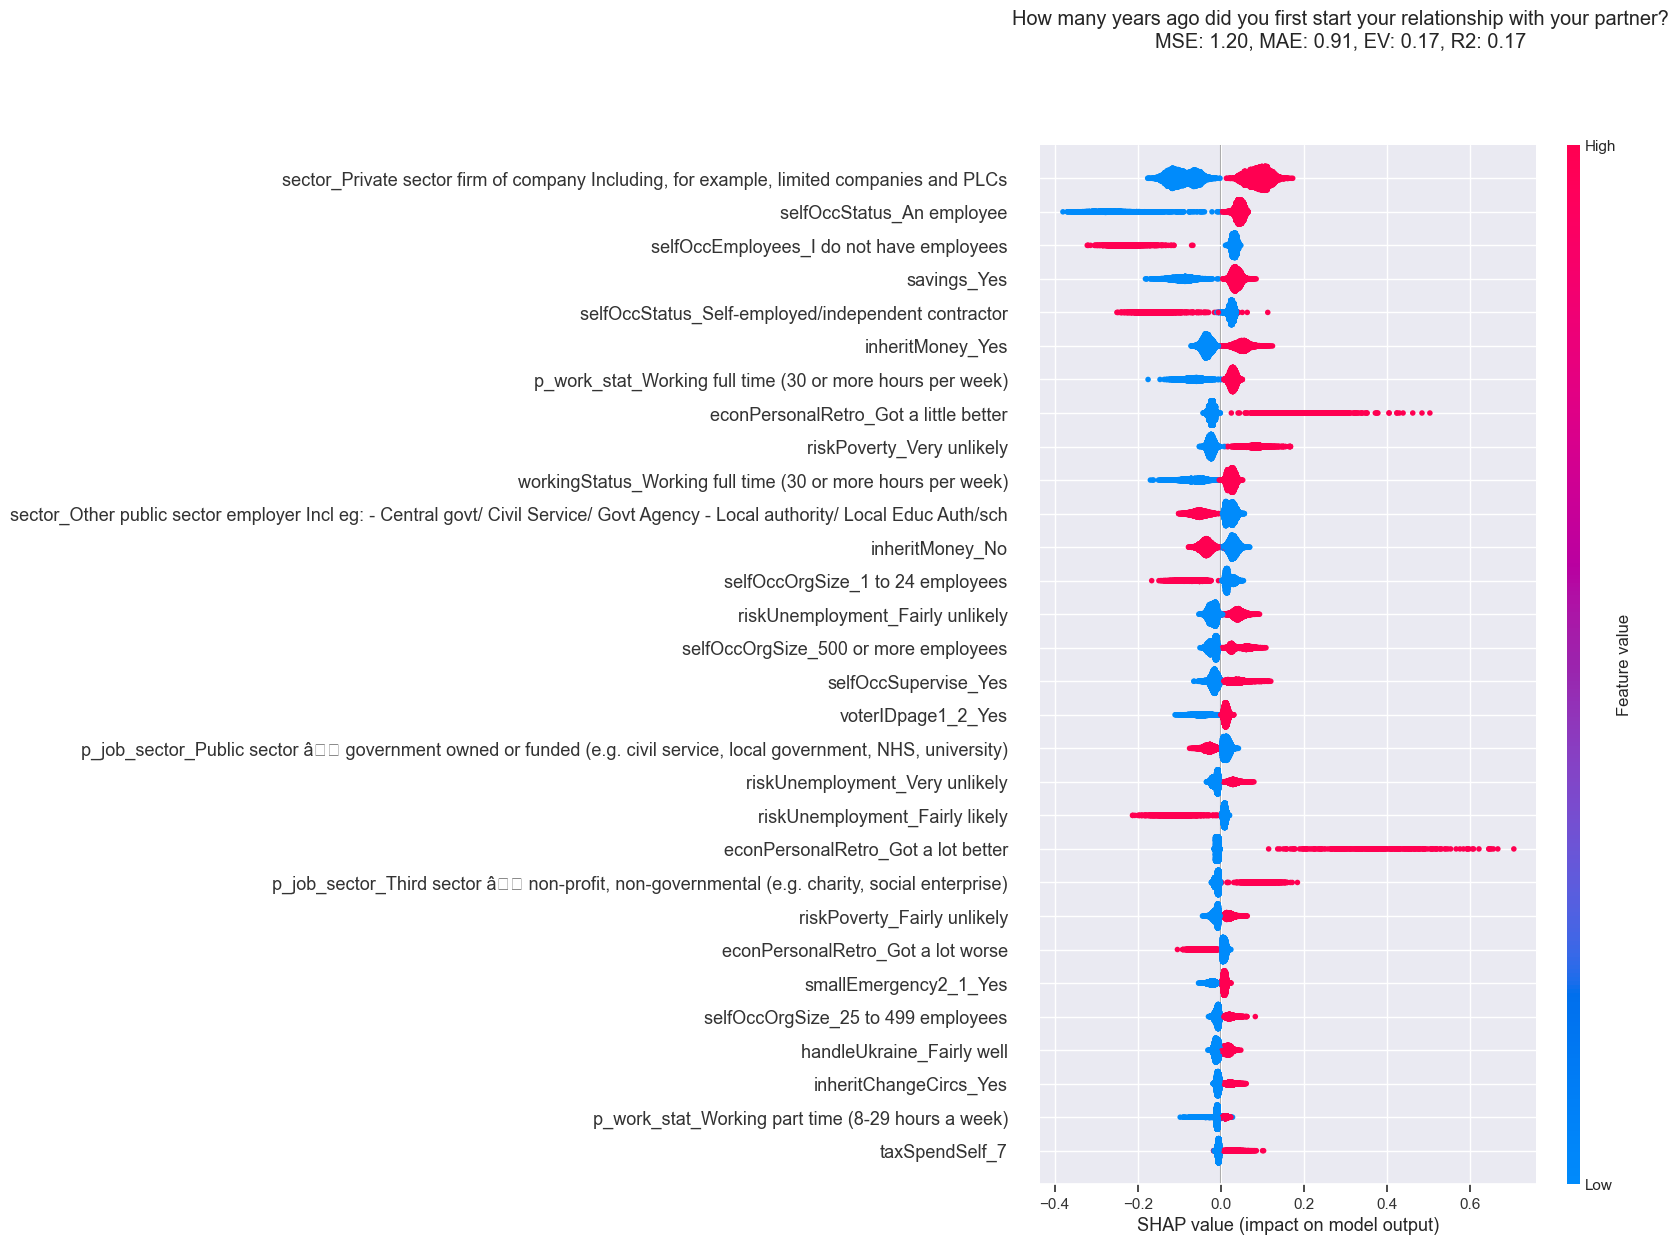

In [12]:
# payRiseAmount
name="payRiseAmountIncZero"
pattern = "payRise"

BES_num[name] = BES_Panel[name].cat.codes.replace(-1,np.nan).loc[BES_num.index]

df, corr_type = make_corr_summary(BES_num, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

In [13]:
### expanding to include no pay rise catches a bunch of people who might not be in work/are self-employed

Top 20 positive (spearman) correlations for payRiseAmount r p N 
 
 p_job_sector_Private sector â profit-seeking[...] 
 0.230000 
 0.00 
 7001 
 
 
 sector_Private sector firm of company Including,[...] 
 0.230000 
 0.00 
 7001 
 
 
 gender_Male 
 0.140000 
 0.00 
 7001 
 
 
 riskPoverty_Very unlikely 
 0.120000 
 0.00 
 7001 
 
 
 econPersonalRetro_Got a lot better 
 0.120000 
 0.00 
 7001 
 
 
 econPersonalRetro_Got a little better 
 0.110000 
 0.00 
 7001 
 
 
 EconSecurityFuture_A lot better 
 0.100000 
 0.00 
 7001 
 
 
 savings_Yes 
 0.100000 
 0.00 
 7001 
 
 
 econPersonalProsp_Get a little better 
 0.090000 
 0.00 
 7001 
 
 
 selfOccStatus_Self-employed/independent contractor 
 0.090000 
 0.00 
 7001 
 
 
 inequalityLevel_About right 
 0.090000 
 0.00 
 7001 
 
 
 smallEmergency2_1_Yes 
 0.090000 
 0.00 
 7001 
 
 
 p_gross_personal_Â Â£100,000 and over 
 0.080000 
 0.00 
 7001 
 
 
 p_gross_household_Â£150,000 and over 
 0.080000 
 0.00 
 7001 
 
 
 p_socgrade_A 
 0.080000 
 0.00 
 7001 
 
 
 lr3_Disagree 
 0.080000 
 0.00 
 7001 
 
 
 econGenProsp_Get a little better 
 0.080000 
 0.00 
 7001 
 
 
 econPersonalProsp_Get a lot better 
 0.070000 
 0.00 
 7001 
 
 
 econPersonalProsp_Stay the same 
 0.070000 
 0.00 
 7001 
 
 
 worryEconSecurity_2 
 0.070000 
 0.00 
 7001 
 
 Top 20 negative (spearman) correlations for payRiseAmount r p N 
 
 sector_Other public sector employer Incl eg: -[...] 
 -0.250000 
 0.00 
 7001 
 
 
 p_job_sector_Public sector â government owned or[...] 
 -0.240000 
 0.00 
 7001 
 
 
 gender_Female 
 -0.140000 
 0.00 
 7001 
 
 
 econPersonalProsp_Get a lot worse 
 -0.110000 
 0.00 
 7001 
 
 
 savings_No 
 -0.100000 
 0.00 
 7001 
 
 
 econPersonalRetro_Got a lot worse 
 -0.090000 
 0.00 
 7001 
 
 
 smallEmergency2_1_No 
 -0.090000 
 0.00 
 7001 
 
 
 selfOccStatus_An employee 
 -0.080000 
 0.00 
 7001 
 
 
 currentUnionMemberW19__Yes 
 -0.080000 
 0.00 
 7001 
 
 
 p_work_stat_Working part time (8-29 hours a week) 
 -0.080000 
 0.00 
 7001 
 
 
 econGenProsp_Get a lot worse 
 -0.080000 
 0.00 
 7001 
 
 
 riskPoverty_Fairly likely 
 -0.080000 
 0.00 
 7001 
 
 
 homeFinance_No one in my family could lend me[...] 
 -0.080000 
 0.00 
 7001 
 
 
 inheritMoney_No 
 -0.080000 
 0.00 
 7001 
 
 
 econPersonalProsp_Get a little worse 
 -0.080000 
 0.00 
 7001 
 
 
 econGenRetro_Got a lot worse 
 -0.070000 
 0.00 
 7001 
 
 
 econPersonalRetro_Got a little worse 
 -0.070000 
 0.00 
 7001 
 
 
 p_gross_personal_Â Â£5,000 to Â£9,999 per year 
 -0.070000 
 0.00 
 7001 
 
 
 ns_sec_L4.1 Traditional employees 
 -0.070000 
 0.00 
 7001 
 
 
 workingStatus_Working part time (8-29 hours per[...] 
 -0.070000 
 0.00 
 7001

MSE: 0.55, MAE: 0.57, EV: 0.13, R2: 0.13


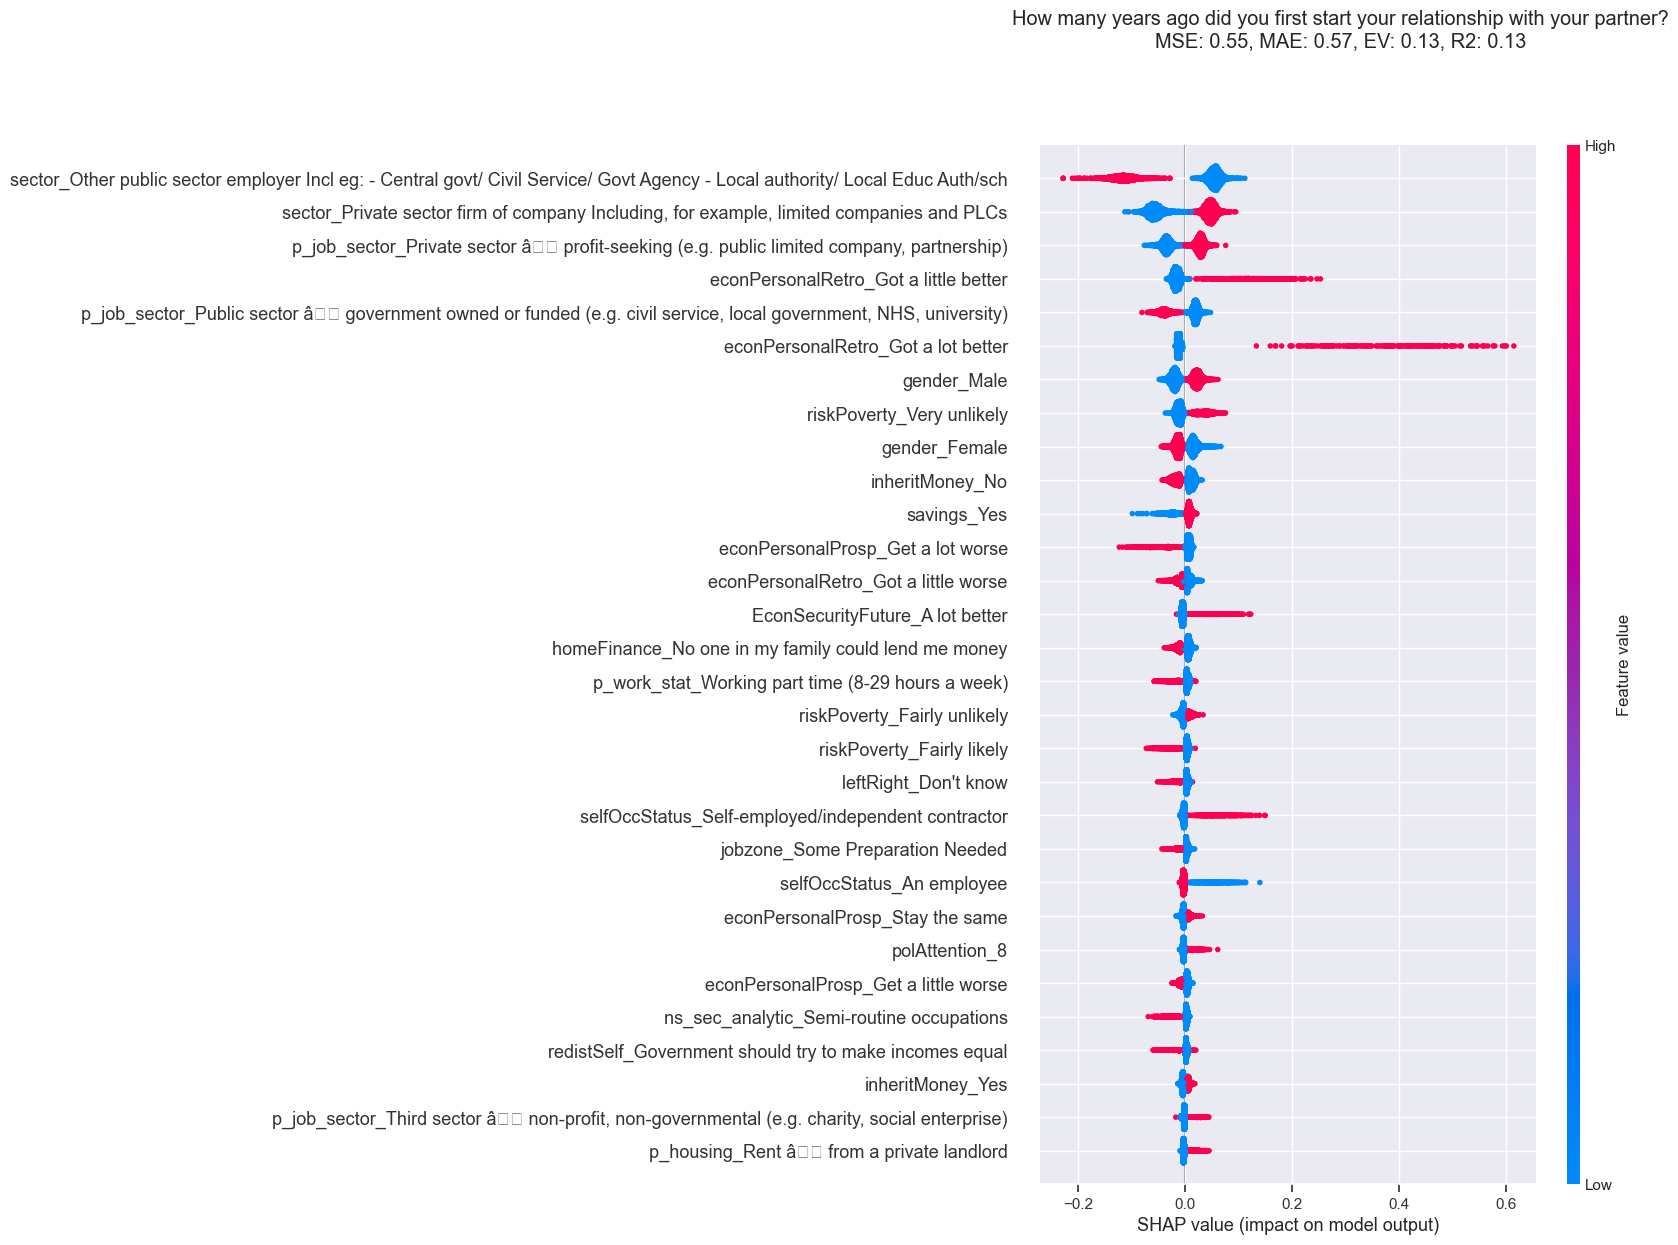

In [14]:
# payRiseAmount
name="payRiseAmount"
pattern = "payRise"

BES_num[name] = BES_Panel[name].replace('Donât know',np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]

df, corr_type = make_corr_summary(BES_num, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

Top 20 positive (spearman) correlations for payRiseAmount r p N 
 
 p_job_sector_Private sector â profit-seeking[...] 
 0.230000 
 0.00 
 7001 
 
 
 sector_Private sector firm of company Including,[...] 
 0.230000 
 0.00 
 7001 
 
 
 gender_Male 
 0.140000 
 0.00 
 7001 
 
 
 riskPoverty_Very unlikely 
 0.120000 
 0.00 
 7001 
 
 
 savings_Yes 
 0.100000 
 0.00 
 7001 
 
 
 selfOccStatus_Self-employed/independent contractor 
 0.090000 
 0.00 
 7001 
 
 
 smallEmergency2_1_Yes 
 0.090000 
 0.00 
 7001 
 
 
 inequalityLevel_About right 
 0.090000 
 0.00 
 7001 
 
 
 p_gross_personal_Â Â£100,000 and over 
 0.080000 
 0.00 
 7001 
 
 
 econGenProsp_Get a little better 
 0.080000 
 0.00 
 7001 
 
 
 p_socgrade_A 
 0.080000 
 0.00 
 7001 
 
 
 p_gross_household_Â£150,000 and over 
 0.080000 
 0.00 
 7001 
 
 
 lr3_Disagree 
 0.080000 
 0.00 
 7001 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 0.070000 
 0.00 
 7001 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 0.070000 
 0.00 
 7001 
 
 
 selfOccEmployees_I do not have employees 
 0.070000 
 0.00 
 7001 
 
 
 currentUnionMemberW19__No 
 0.070000 
 0.00 
 7001 
 
 
 worryEconSecurity_Not at all worried 
 0.070000 
 0.00 
 7001 
 
 
 savingsAmtb_Â£200,000 or above 
 0.070000 
 0.00 
 7001 
 
 
 worryEconSecurity_2 
 0.070000 
 0.00 
 7001 
 
 Top 20 negative (spearman) correlations for payRiseAmount r p N 
 
 sector_Other public sector employer Incl eg: -[...] 
 -0.250000 
 0.00 
 7001 
 
 
 p_job_sector_Public sector â government owned or[...] 
 -0.240000 
 0.00 
 7001 
 
 
 gender_Female 
 -0.140000 
 0.00 
 7001 
 
 
 savings_No 
 -0.100000 
 0.00 
 7001 
 
 
 smallEmergency2_1_No 
 -0.090000 
 0.00 
 7001 
 
 
 inheritMoney_No 
 -0.080000 
 0.00 
 7001 
 
 
 econGenProsp_Get a lot worse 
 -0.080000 
 0.00 
 7001 
 
 
 homeFinance_No one in my family could lend me[...] 
 -0.080000 
 0.00 
 7001 
 
 
 p_work_stat_Working part time (8-29 hours a week) 
 -0.080000 
 0.00 
 7001 
 
 
 selfOccStatus_An employee 
 -0.080000 
 0.00 
 7001 
 
 
 currentUnionMemberW19__Yes 
 -0.080000 
 0.00 
 7001 
 
 
 riskPoverty_Fairly likely 
 -0.080000 
 0.00 
 7001 
 
 
 lrCon_Don't know 
 -0.070000 
 0.00 
 7001 
 
 
 p_education_Teaching qualification (not degree) 
 -0.070000 
 0.00 
 7001 
 
 
 workingStatus_Working part time (8-29 hours per[...] 
 -0.070000 
 0.00 
 7001 
 
 
 econGenRetro_Got a lot worse 
 -0.070000 
 0.00 
 7001 
 
 
 ns_sec_L4.1 Traditional employees 
 -0.070000 
 0.00 
 7001 
 
 
 p_gross_personal_Â Â£5,000 to Â£9,999 per year 
 -0.070000 
 0.00 
 7001 
 
 
 leftRight_Don't know 
 -0.070000 
 0.00 
 7001 
 
 
 voterIDpage2_6_No 
 -0.060000 
 0.00 
 7001

MSE: 0.55, MAE: 0.57, EV: 0.12, R2: 0.12


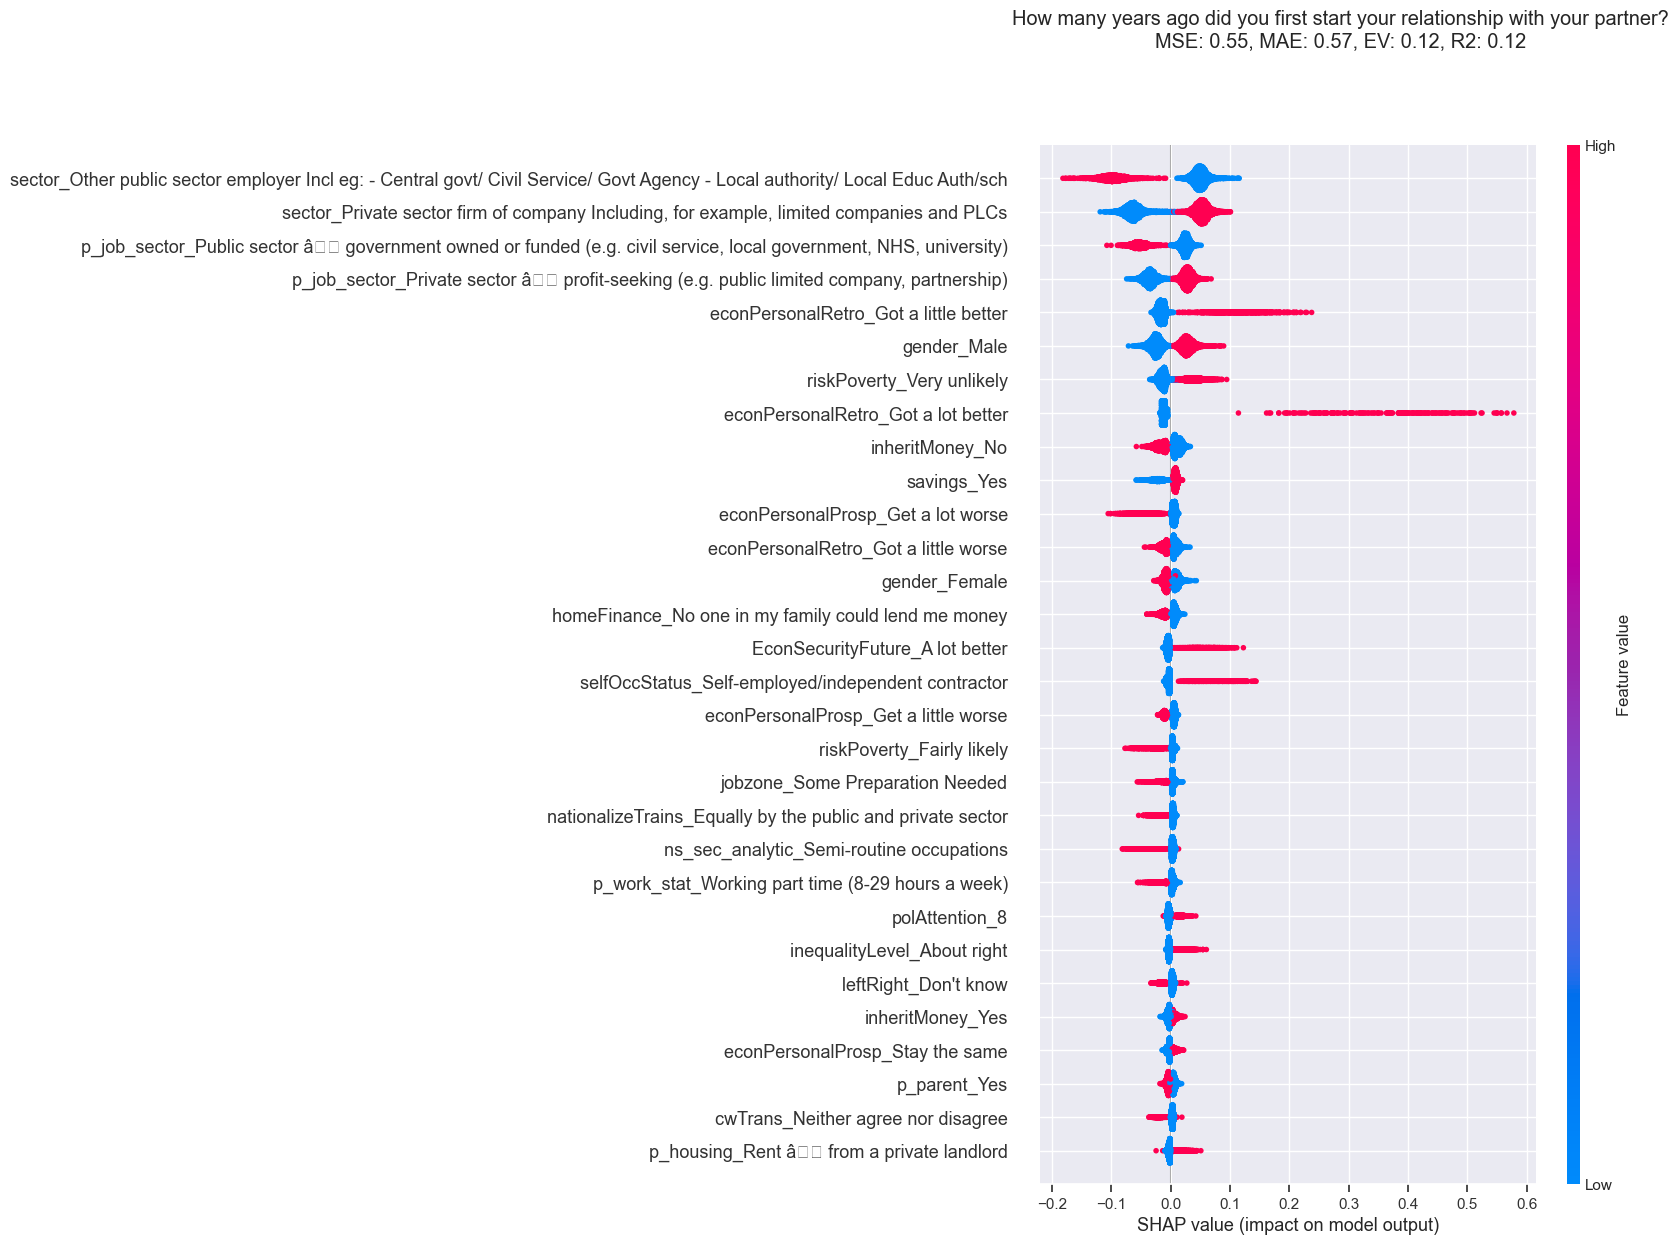

In [15]:
# payRiseAmount
name="payRiseAmount"
pattern = "payRise|econPersonal|EconSecurityFuture"

BES_num[name] = BES_Panel[name].replace('Donât know',np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]

df, corr_type = make_corr_summary(BES_num, name, pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

Top 20 positive (spearman) correlations for inequalityLevel r p N 
 
 partyId_Conservative 
 0.360000 
 0.00 
 22371 
 
 
 generalElectionVote_Conservative 
 0.340000 
 0.00 
 22371 
 
 
 conLookAfterWC_Fairly closely 
 0.320000 
 0.00 
 22371 
 
 
 p_past_vote_2017_Conservative 
 0.310000 
 0.00 
 22371 
 
 
 p_past_vote_2019_Conservative 
 0.310000 
 0.00 
 22371 
 
 
 lr3_Disagree 
 0.300000 
 0.00 
 22371 
 
 
 lr1_Strongly disagree 
 0.300000 
 0.00 
 22371 
 
 
 lr3_Neither agree nor disagree 
 0.290000 
 0.00 
 22371 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.290000 
 0.00 
 22371 
 
 
 lr1_Disagree 
 0.290000 
 0.00 
 22371 
 
 
 lr4_Disagree 
 0.290000 
 0.00 
 22371 
 
 
 cutsTooFarNational_About right 
 0.290000 
 0.00 
 22371 
 
 
 conLookAfterPublic_Fairly closely 
 0.280000 
 0.00 
 22371 
 
 
 bestOnMII_Conservative 
 0.280000 
 0.00 
 22371 
 
 
 conLookAfterYoung_Fairly closely 
 0.280000 
 0.00 
 22371 
 
 
 p_past_vote_2015_Conservative 
 0.280000 
 0.00 
 22371 
 
 
 privatTooFar_About right 
 0.280000 
 0.00 
 22371 
 
 
 cutsTooFarLocal_About right 
 0.280000 
 0.00 
 22371 
 
 
 ptvCon_Very likely 
 0.270000 
 0.00 
 22371 
 
 
 redistSelf_Government should be less concerned[...] 
 0.270000 
 0.00 
 22371 
 
 Top 20 negative (spearman) correlations for inequalityLevel r p N 
 
 lr4_Strongly agree 
 -0.440000 
 0.00 
 22371 
 
 
 lr3_Strongly agree 
 -0.440000 
 0.00 
 22371 
 
 
 govtHandleCostLive_Very badly 
 -0.410000 
 0.00 
 22371 
 
 
 govtHandleNHS_Very badly 
 -0.410000 
 0.00 
 22371 
 
 
 likeCon_Strongly dislike 
 -0.410000 
 0.00 
 22371 
 
 
 ptvCon_Very unlikely 
 -0.410000 
 0.00 
 22371 
 
 
 govtHandleEcon_Very badly 
 -0.390000 
 0.00 
 22371 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.380000 
 0.00 
 22371 
 
 
 cutsTooFarNational_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 privatTooFar_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 conLookAfterWC_Not at all closely 
 -0.370000 
 0.00 
 22371 
 
 
 lr2_Strongly agree 
 -0.370000 
 0.00 
 22371 
 
 
 govtHandlePollution_Very badly 
 -0.360000 
 0.00 
 22371 
 
 
 lr1_Strongly agree 
 -0.360000 
 0.00 
 22371 
 
 
 changeEconomy_Getting a lot worse 
 -0.340000 
 0.00 
 22371 
 
 
 govtHandleEduc_Very badly 
 -0.340000 
 0.00 
 22371 
 
 
 econGenRetro_Got a lot worse 
 -0.330000 
 0.00 
 22371 
 
 
 conLookAfterPublic_Not at all closely 
 -0.330000 
 0.00 
 22371 
 
 
 likeTrussFormer_Strongly dislike 
 -0.320000 
 0.00 
 22371

MSE: 0.34, MAE: 0.42, EV: 0.47, R2: 0.47


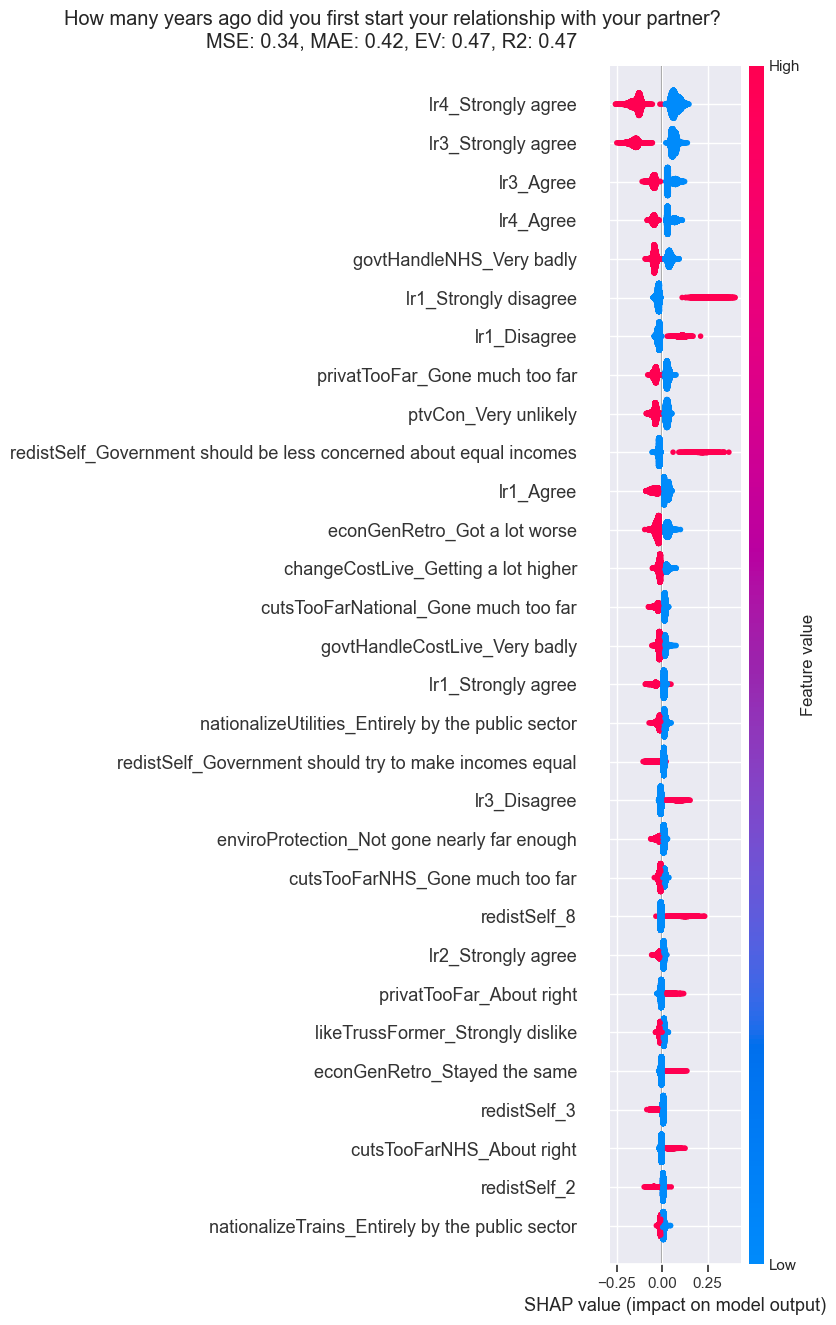

In [16]:
# inequalityLevel
name="inequalityLevel"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [17]:
# discrimGay
name="discrimGay"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for discrimGay r p N 
 
 discrimTrans_A lot of discrimination against 
 0.460000 
 0.00 
 21790 
 
 
 discrimBME_A lot of discrimination against 
 0.290000 
 0.00 
 21790 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.280000 
 0.00 
 21790 
 
 
 euID_The remain side 
 0.260000 
 0.00 
 21790 
 
 
 discrimTrans_9 
 0.250000 
 0.00 
 21790 
 
 
 conLookAfterBA_Not at all closely 
 0.240000 
 0.00 
 21790 
 
 
 discrimTrans_8 
 0.240000 
 0.00 
 21790 
 
 
 discrimBME_8 
 0.240000 
 0.00 
 21790 
 
 
 cwParents_Agree 
 0.230000 
 0.00 
 21790 
 
 
 p_past_vote_2019_Labour 
 0.220000 
 0.00 
 21790 
 
 
 ptvCon_Very unlikely 
 0.220000 
 0.00 
 21790 
 
 
 cwParents_Strongly agree 
 0.220000 
 0.00 
 21790 
 
 
 likeCon_Strongly dislike 
 0.220000 
 0.00 
 21790 
 
 
 generalElectionVote_Labour 
 0.220000 
 0.00 
 21790 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.210000 
 0.00 
 21790 
 
 
 cwAuthors_Agree 
 0.210000 
 0.00 
 21790 
 
 
 enviroProtection_Not gone nearly far enough 
 0.210000 
 0.00 
 21790 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.210000 
 0.00 
 21790 
 
 
 partyId_Labour 
 0.200000 
 0.00 
 21790 
 
 
 cutsTooFarNHS_Gone much too far 
 0.200000 
 0.00 
 21790 
 
 Top 20 negative (spearman) correlations for discrimGay r p N 
 
 discrimTrans_A lot of discrimination in favour 
 -0.430000 
 0.00 
 21790 
 
 
 cwTrans_Strongly disagree 
 -0.330000 
 0.00 
 21790 
 
 
 discrimBME_A lot of discrimination in favour 
 -0.320000 
 0.00 
 21790 
 
 
 cwAuthors_Strongly disagree 
 -0.300000 
 0.00 
 21790 
 
 
 cwParents_Strongly disagree 
 -0.300000 
 0.00 
 21790 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.290000 
 0.00 
 21790 
 
 
 labHandleImmig_Very badly 
 -0.290000 
 0.00 
 21790 
 
 
 cwStatues_Strongly agree 
 -0.280000 
 0.00 
 21790 
 
 
 labHandleEcon_Very badly 
 -0.270000 
 0.00 
 21790 
 
 
 euID_The leave side 
 -0.270000 
 0.00 
 21790 
 
 
 p_past_vote_2019_Conservative 
 -0.260000 
 0.00 
 21790 
 
 
 p_eurefvote_I voted to leave 
 -0.260000 
 0.00 
 21790 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.250000 
 0.00 
 21790 
 
 
 labLookAfterWhite_Not at all closely 
 -0.250000 
 0.00 
 21790 
 
 
 discrimTrans_2 
 -0.250000 
 0.00 
 21790 
 
 
 labHandleCostLive_Very badly 
 -0.250000 
 0.00 
 21790 
 
 
 cwLanguage_Strongly agree 
 -0.250000 
 0.00 
 21790 
 
 
 likeGrn_Strongly dislike 
 -0.240000 
 0.00 
 21790 
 
 
 labHandleLevelCrime_Very badly 
 -0.240000 
 0.00 
 21790 
 
 
 cwTraining_Strongly agree 
 -0.240000 
 0.00 
 21790

MSE: 1.56, MAE: 0.90, EV: 0.75, R2: 0.75


In [18]:
# discrimTrans
name="discrimTrans"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for discrimTrans r p N 
 
 discrimGay 
 0.820000 
 0.00 
 21147 
 
 
 discrimGay_A lot of discrimination against 
 0.340000 
 0.00 
 21377 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.340000 
 0.00 
 21377 
 
 
 euID_The remain side 
 0.330000 
 0.00 
 21377 
 
 
 discrimGay_8 
 0.300000 
 0.00 
 21377 
 
 
 conLookAfterBA_Not at all closely 
 0.290000 
 0.00 
 21377 
 
 
 discrimGay_7 
 0.280000 
 0.00 
 21377 
 
 
 discrimBME_A lot of discrimination against 
 0.280000 
 0.00 
 21377 
 
 
 ptvCon_Very unlikely 
 0.270000 
 0.00 
 21377 
 
 
 enviroProtection_Not gone nearly far enough 
 0.270000 
 0.00 
 21377 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.270000 
 0.00 
 21377 
 
 
 likeCon_Strongly dislike 
 0.270000 
 0.00 
 21377 
 
 
 p_past_vote_2019_Labour 
 0.260000 
 0.00 
 21377 
 
 
 cwParents_Agree 
 0.260000 
 0.00 
 21377 
 
 
 generalElectionVote_Labour 
 0.260000 
 0.00 
 21377 
 
 
 discrimBME_8 
 0.260000 
 0.00 
 21377 
 
 
 cwParents_Strongly agree 
 0.260000 
 0.00 
 21377 
 
 
 cwTraining_Strongly disagree 
 0.260000 
 0.00 
 21377 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.250000 
 0.00 
 21377 
 
 
 al2_Strongly disagree 
 0.250000 
 0.00 
 21377 
 
 Top 20 negative (spearman) correlations for discrimTrans r p N 
 
 discrimGay_A lot of discrimination in favour 
 -0.400000 
 0.00 
 21377 
 
 
 cwTrans_Strongly disagree 
 -0.380000 
 0.00 
 21377 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.350000 
 0.00 
 21377 
 
 
 labHandleImmig_Very badly 
 -0.340000 
 0.00 
 21377 
 
 
 euID_The leave side 
 -0.330000 
 0.00 
 21377 
 
 
 discrimBME_A lot of discrimination in favour 
 -0.330000 
 0.00 
 21377 
 
 
 cwAuthors_Strongly disagree 
 -0.320000 
 0.00 
 21377 
 
 
 cwStatues_Strongly agree 
 -0.320000 
 0.00 
 21377 
 
 
 cwParents_Strongly disagree 
 -0.310000 
 0.00 
 21377 
 
 
 p_past_vote_2019_Conservative 
 -0.310000 
 0.00 
 21377 
 
 
 labHandleEcon_Very badly 
 -0.310000 
 0.00 
 21377 
 
 
 p_eurefvote_I voted to leave 
 -0.310000 
 0.00 
 21377 
 
 
 cwLanguage_Strongly agree 
 -0.290000 
 0.00 
 21377 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.290000 
 0.00 
 21377 
 
 
 labHandleLevelCrime_Very badly 
 -0.280000 
 0.00 
 21377 
 
 
 labHandleCostLive_Very badly 
 -0.280000 
 0.00 
 21377 
 
 
 ptvLab_Very unlikely 
 -0.280000 
 0.00 
 21377 
 
 
 likeCorbynFormer_Strongly dislike 
 -0.280000 
 0.00 
 21377 
 
 
 changeImmig_Getting a lot higher 
 -0.280000 
 0.00 
 21377 
 
 
 labLookAfterWhite_Not at all closely 
 -0.280000 
 0.00 
 21377

MSE: 2.22, MAE: 1.00, EV: 0.76, R2: 0.76


Top 20 positive (spearman) correlations for pubPrivEfficient r p N 
 
 nationalizeUtilities_Entirely by the public sector 
 0.530000 
 0.00 
 20890 
 
 
 privatTooFar_Gone much too far 
 0.500000 
 0.00 
 20890 
 
 
 nationalizeTrains_Entirely by the public sector 
 0.490000 
 0.00 
 20890 
 
 
 nationalizeHospitals_Entirely by the public sector 
 0.390000 
 0.00 
 20890 
 
 
 inequalityLevel_Much too high 
 0.390000 
 0.00 
 20890 
 
 
 cutsTooFarNational_Gone much too far 
 0.370000 
 0.00 
 20890 
 
 
 ptvCon_Very unlikely 
 0.370000 
 0.00 
 20890 
 
 
 likeCon_Strongly dislike 
 0.360000 
 0.00 
 20890 
 
 
 cutsTooFarNHS_Gone much too far 
 0.360000 
 0.00 
 20890 
 
 
 nationalizeSchools_Entirely by the public sector 
 0.350000 
 0.00 
 20890 
 
 
 govtHandleNHS_Very badly 
 0.340000 
 0.00 
 20890 
 
 
 lr3_Strongly agree 
 0.330000 
 0.00 
 20890 
 
 
 govtHandleCostLive_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.330000 
 0.00 
 20890 
 
 
 govtHandlePollution_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 lr4_Strongly agree 
 0.330000 
 0.00 
 20890 
 
 
 govtHandleEcon_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 lr2_Strongly agree 
 0.310000 
 0.00 
 20890 
 
 
 conLookAfterPublic_Not at all closely 
 0.310000 
 0.00 
 20890 
 
 
 cutsTooFarLocal_Gone much too far 
 0.310000 
 0.00 
 20890 
 
 Top 20 negative (spearman) correlations for pubPrivEfficient r p N 
 
 inequalityLevel 
 -0.410000 
 0.00 
 19165 
 
 
 privatTooFar_About right 
 -0.340000 
 0.00 
 20890 
 
 
 partyId_Conservative 
 -0.290000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Mostly by the private sector 
 -0.290000 
 0.00 
 20890 
 
 
 p_past_vote_2017_Conservative 
 -0.270000 
 0.00 
 20890 
 
 
 p_past_vote_2015_Conservative 
 -0.260000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Equally by the public and[...] 
 -0.260000 
 0.00 
 20890 
 
 
 generalElectionVote_Conservative 
 -0.250000 
 0.00 
 20890 
 
 
 inequalityLevel_About right 
 -0.250000 
 0.00 
 20890 
 
 
 nationalizeTrains_Mostly by the private sector 
 -0.250000 
 0.00 
 20890 
 
 
 conLookAfterWC_Fairly closely 
 -0.250000 
 0.00 
 20890 
 
 
 nationalizeTrains_Equally by the public and[...] 
 -0.240000 
 0.00 
 20890 
 
 
 cutsTooFarLocal_About right 
 -0.240000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Entirely by the private[...] 
 -0.240000 
 0.00 
 20890 
 
 
 p_past_vote_2019_Conservative 
 -0.240000 
 0.00 
 20890 
 
 
 cutsTooFarNational_About right 
 -0.230000 
 0.00 
 20890 
 
 
 nationalizeHospitals_Equally by the public and[...] 
 -0.230000 
 0.00 
 20890 
 
 
 conLookAfterPublic_Fairly closely 
 -0.230000 
 0.00 
 20890 
 
 
 bestOnMII_Conservative 
 -0.230000 
 0.00 
 20890 
 
 
 conLookAfterNoEducated_Fairly closely 
 -0.220000 
 0.00 
 20890

MSE: 3.91, MAE: 1.47, EV: 0.49, R2: 0.49


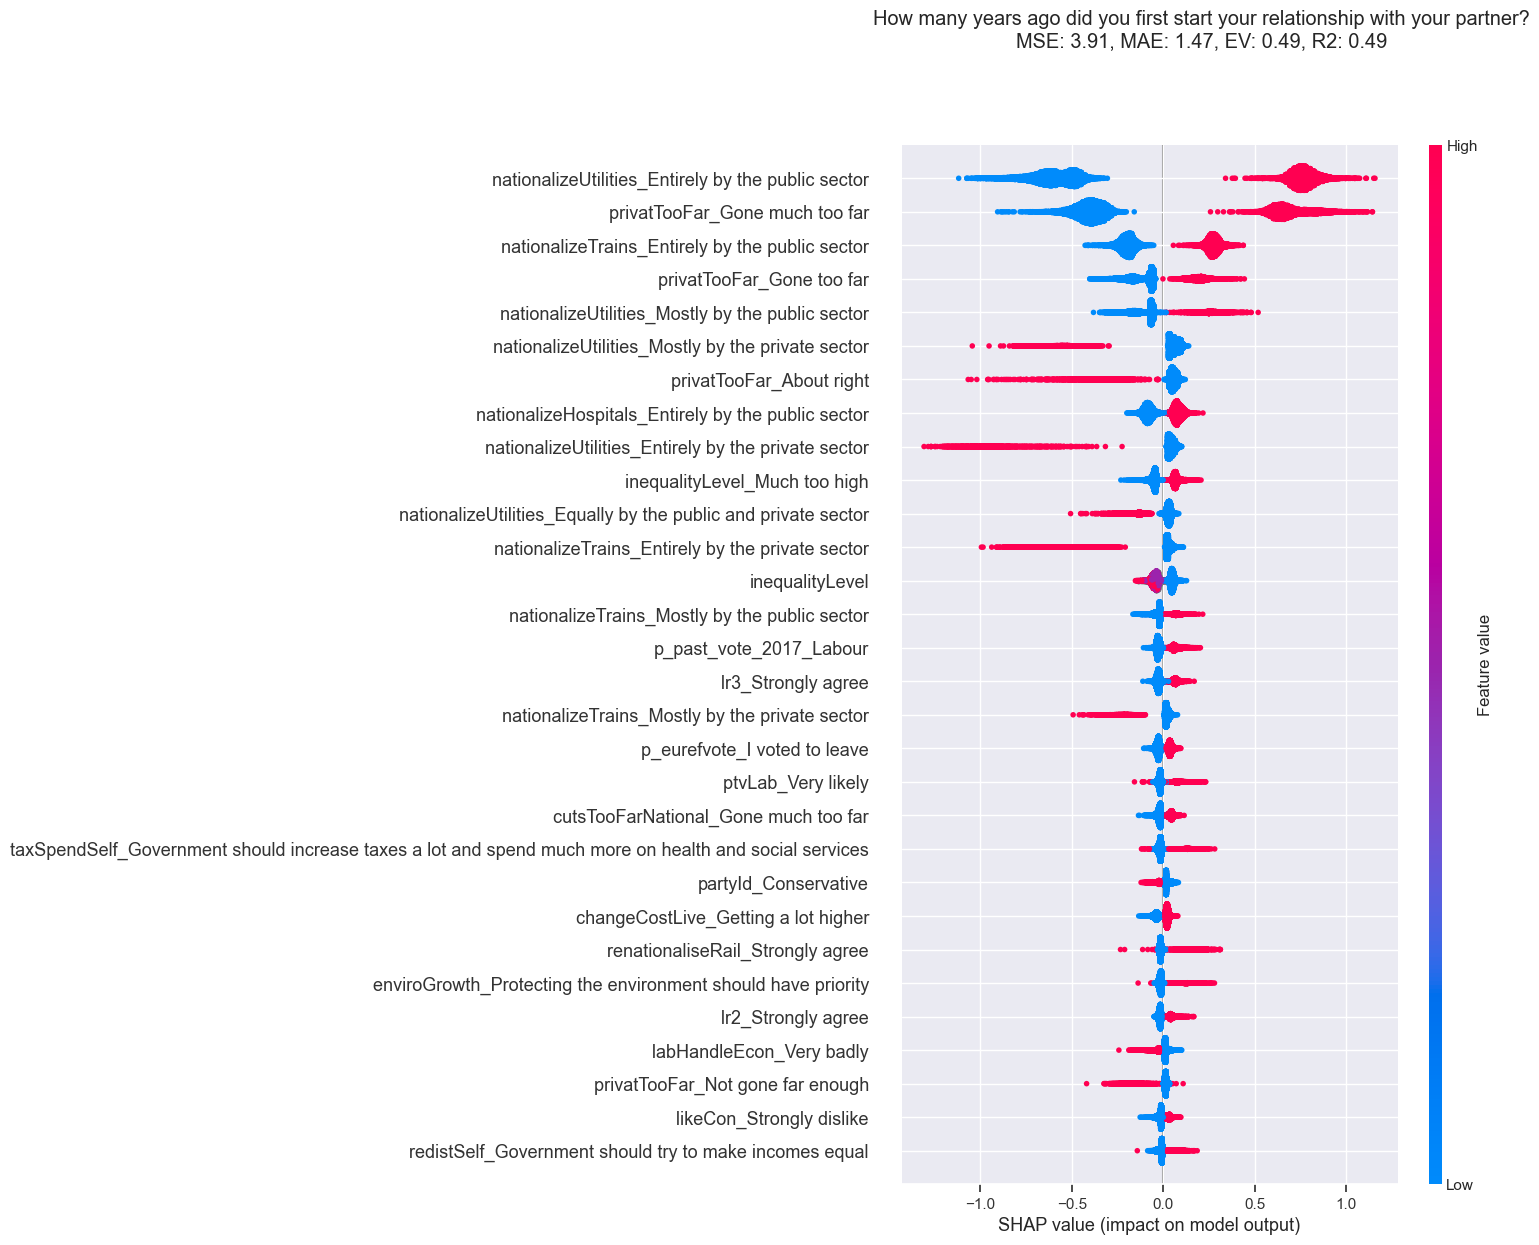

In [19]:
# pubPrivEfficient
name="pubPrivEfficient"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [20]:
# changeSchools
name="changeSchools"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for changeSchools r p N 
 
 changeNHS_Staying about the same 
 0.310000 
 0.00 
 22106 
 
 
 govtHandleEduc_Neither well nor badly 
 0.290000 
 0.00 
 22106 
 
 
 govtHandleEduc_Fairly well 
 0.270000 
 0.00 
 22106 
 
 
 inequalityLevel 
 0.270000 
 0.00 
 19981 
 
 
 changeNHS_Getting a little worse 
 0.240000 
 0.00 
 22106 
 
 
 cutsTooFarLocal_About right 
 0.210000 
 0.00 
 22106 
 
 
 changeEconomy_Staying about the same 
 0.210000 
 0.00 
 22106 
 
 
 cutsTooFarNational_About right 
 0.200000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Fairly well 
 0.190000 
 0.00 
 22106 
 
 
 govtHandleNHS_Neither well nor badly 
 0.190000 
 0.00 
 22106 
 
 
 generalElectionVote_Conservative 
 0.190000 
 0.00 
 22106 
 
 
 privatTooFar_About right 
 0.190000 
 0.00 
 22106 
 
 
 changeCrime_Staying about the same 
 0.190000 
 0.00 
 22106 
 
 
 changeCostLive_Getting a little higher 
 0.190000 
 0.00 
 22106 
 
 
 changeNHS_Getting a little better 
 0.190000 
 0.00 
 22106 
 
 
 changeEconomy_Getting a little better 
 0.190000 
 0.00 
 22106 
 
 
 econGenProsp_Get a little better 
 0.180000 
 0.00 
 22106 
 
 
 govtHandleNHS_Fairly well 
 0.180000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Neither well nor badly 
 0.180000 
 0.00 
 22106 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.180000 
 0.00 
 22106 
 
 Top 20 negative (spearman) correlations for changeSchools r p N 
 
 changeNHS_Getting a lot worse 
 -0.490000 
 0.00 
 22106 
 
 
 govtHandleEduc_Very badly 
 -0.470000 
 0.00 
 22106 
 
 
 changeEconomy_Getting a lot worse 
 -0.390000 
 0.00 
 22106 
 
 
 govtHandleNHS_Very badly 
 -0.360000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Very badly 
 -0.340000 
 0.00 
 22106 
 
 
 govtHandleEcon_Very badly 
 -0.330000 
 0.00 
 22106 
 
 
 govtHandleImmig_Very badly 
 -0.320000 
 0.00 
 22106 
 
 
 govtHandlePollution_Very badly 
 -0.310000 
 0.00 
 22106 
 
 
 cutsTooFarNational_Gone much too far 
 -0.300000 
 0.00 
 22106 
 
 
 govtHandleCostLive_Very badly 
 -0.300000 
 0.00 
 22106 
 
 
 econGenProsp_Get a lot worse 
 -0.300000 
 0.00 
 22106 
 
 
 econGenRetro_Got a lot worse 
 -0.300000 
 0.00 
 22106 
 
 
 cutsTooFarLocal_Gone much too far 
 -0.290000 
 0.00 
 22106 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.280000 
 0.00 
 22106 
 
 
 conLookAfterWC_Not at all closely 
 -0.270000 
 0.00 
 22106 
 
 
 privatTooFar_Gone much too far 
 -0.270000 
 0.00 
 22106 
 
 
 likeCon_Strongly dislike 
 -0.270000 
 0.00 
 22106 
 
 
 inequalityLevel_Much too high 
 -0.260000 
 0.00 
 22106 
 
 
 trustMPs_No trust 
 -0.260000 
 0.00 
 22106 
 
 
 ptvCon_Very unlikely 
 -0.260000 
 0.00 
 22106

MSE: 0.39, MAE: 0.48, EV: 0.48, R2: 0.48


In [21]:
# # likeYousaf
# name="likeYousaf"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
# df, corr_type = make_corr_summary(BES_num, name)
# display_corr(df,name,corr_type)

# (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
#     title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
#                                                     var_list = [name],var_stub_list = [name],verbosity=0)

In [22]:
# likeCorbynFormer
name="likeCorbynFormer"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for likeCorbynFormer r p N 
 
 p_past_vote_2019_Labour 
 0.490000 
 0.00 
 23996 
 
 
 p_past_vote_2017_Labour 
 0.420000 
 0.00 
 23996 
 
 
 partyId_Labour 
 0.410000 
 0.00 
 23996 
 
 
 generalElectionVote_Labour 
 0.400000 
 0.00 
 23996 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.380000 
 0.00 
 23996 
 
 
 euID_The remain side 
 0.370000 
 0.00 
 23996 
 
 
 ptvCon_Very unlikely 
 0.370000 
 0.00 
 23996 
 
 
 likeCon_Strongly dislike 
 0.350000 
 0.00 
 23996 
 
 
 bestOnMII_Labour 
 0.340000 
 0.00 
 23996 
 
 
 discrimTrans 
 0.320000 
 0.00 
 20713 
 
 
 labHandleEcon_Fairly well 
 0.320000 
 0.00 
 23996 
 
 
 labHandleCostLive_Fairly well 
 0.320000 
 0.00 
 23996 
 
 
 ptvLab_Very likely 
 0.310000 
 0.00 
 23996 
 
 
 p_past_vote_2015_Labour 
 0.310000 
 0.00 
 23996 
 
 
 conLookAfterBA_Not at all closely 
 0.300000 
 0.00 
 23996 
 
 
 labLookAfterMC_Fairly closely 
 0.290000 
 0.00 
 23996 
 
 
 labHandleImmig_Fairly well 
 0.280000 
 0.00 
 23996 
 
 
 discrimGay 
 0.280000 
 0.00 
 21128 
 
 
 conLookAfterYoung_Not at all closely 
 0.270000 
 0.00 
 23996 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.270000 
 0.00 
 23996 
 
 Top 20 negative (spearman) correlations for likeCorbynFormer r p N 
 
 p_past_vote_2019_Conservative 
 -0.490000 
 0.00 
 23996 
 
 
 p_past_vote_2017_Conservative 
 -0.470000 
 0.00 
 23996 
 
 
 ptvLab_Very unlikely 
 -0.450000 
 0.00 
 23996 
 
 
 partyId_Conservative 
 -0.410000 
 0.00 
 23996 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.410000 
 0.00 
 23996 
 
 
 labHandleImmig_Very badly 
 -0.410000 
 0.00 
 23996 
 
 
 labHandleEcon_Very badly 
 -0.400000 
 0.00 
 23996 
 
 
 likeLab_Strongly dislike 
 -0.400000 
 0.00 
 23996 
 
 
 euID_The leave side 
 -0.380000 
 0.00 
 23996 
 
 
 ptvGrn_Very unlikely 
 -0.380000 
 0.00 
 23996 
 
 
 p_past_vote_2015_Conservative 
 -0.370000 
 0.00 
 23996 
 
 
 labHandleCostLive_Very badly 
 -0.360000 
 0.00 
 23996 
 
 
 p_eurefvote_I voted to leave 
 -0.350000 
 0.00 
 23996 
 
 
 monarch_Strongly agree 
 -0.350000 
 0.00 
 23996 
 
 
 labHandleLevelCrime_Very badly 
 -0.350000 
 0.00 
 23996 
 
 
 likeStarmer_Strongly dislike 
 -0.340000 
 0.00 
 23996 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.340000 
 0.00 
 23996 
 
 
 p_past_vote_2010_Conservative 
 -0.340000 
 0.00 
 23996 
 
 
 cwStatues_Strongly agree 
 -0.330000 
 0.00 
 23996 
 
 
 generalElectionVote_Conservative 
 -0.320000 
 0.00 
 23996

MSE: 4.00, MAE: 1.46, EV: 0.59, R2: 0.59


In [23]:
# # likeSturgeonFormer
# name="likeSturgeonFormer"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
# df, corr_type = make_corr_summary(BES_num, name)
# display_corr(df,name,corr_type)

# (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
#     title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
#                                                     var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for govtHandlePollution r p N 
 
 inequalityLevel 
 0.430000 
 0.00 
 20067 
 
 
 generalElectionVote_Conservative 
 0.380000 
 0.00 
 22130 
 
 
 changeSchools 
 0.350000 
 0.00 
 19992 
 
 
 partyId_Conservative 
 0.350000 
 0.00 
 22130 
 
 
 p_past_vote_2019_Conservative 
 0.350000 
 0.00 
 22130 
 
 
 conLookAfterYoung_Fairly closely 
 0.320000 
 0.00 
 22130 
 
 
 enviroProtection_About right 
 0.320000 
 0.00 
 22130 
 
 
 bestOnMII_Conservative 
 0.310000 
 0.00 
 22130 
 
 
 conLookAfterWC_Fairly closely 
 0.310000 
 0.00 
 22130 
 
 
 p_past_vote_2017_Conservative 
 0.310000 
 0.00 
 22130 
 
 
 govtHandleEduc_Neither well nor badly 
 0.310000 
 0.00 
 22130 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.310000 
 0.00 
 22130 
 
 
 govtHandleEcon_Fairly well 
 0.310000 
 0.00 
 22130 
 
 
 ptvCon_Very likely 
 0.300000 
 0.00 
 22130 
 
 
 govtHandleEduc_Fairly well 
 0.300000 
 0.00 
 22130 
 
 
 conLookAfterPublic_Fairly closely 
 0.290000 
 0.00 
 22130 
 
 
 govtHandleNHS_Neither well nor badly 
 0.290000 
 0.00 
 22130 
 
 
 euID_The leave side 
 0.290000 
 0.00 
 22130 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.280000 
 0.00 
 22130 
 
 
 cutsTooFarLocal_About right 
 0.280000 
 0.00 
 22130 
 
 Top 20 negative (spearman) correlations for govtHandlePollution r p N 
 
 govtHandleNHS_Very badly 
 -0.530000 
 0.00 
 22130 
 
 
 govtHandleEduc_Very badly 
 -0.520000 
 0.00 
 22130 
 
 
 govtHandleEcon_Very badly 
 -0.510000 
 0.00 
 22130 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.490000 
 0.00 
 22130 
 
 
 govtHandleCostLive_Very badly 
 -0.480000 
 0.00 
 22130 
 
 
 likeCon_Strongly dislike 
 -0.480000 
 0.00 
 22130 
 
 
 ptvCon_Very unlikely 
 -0.470000 
 0.00 
 22130 
 
 
 govtHandleImmig_Very badly 
 -0.430000 
 0.00 
 22130 
 
 
 govtHandleLevelCrime_Very badly 
 -0.430000 
 0.00 
 22130 
 
 
 enviroProtection_Not gone nearly far enough 
 -0.420000 
 0.00 
 22130 
 
 
 cutsTooFarNational_Gone much too far 
 -0.410000 
 0.00 
 22130 
 
 
 conLookAfterYoung_Not at all closely 
 -0.400000 
 0.00 
 22130 
 
 
 conLookAfterWC_Not at all closely 
 -0.400000 
 0.00 
 22130 
 
 
 inequalityLevel_Much too high 
 -0.400000 
 0.00 
 22130 
 
 
 privatTooFar_Gone much too far 
 -0.390000 
 0.00 
 22130 
 
 
 conLookAfterPublic_Not at all closely 
 -0.390000 
 0.00 
 22130 
 
 
 likeTrussFormer_Strongly dislike 
 -0.390000 
 0.00 
 22130 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.380000 
 0.00 
 22130 
 
 
 conLookAfterBA_Not at all closely 
 -0.360000 
 0.00 
 22130 
 
 
 likeSunak_Strongly dislike 
 -0.350000 
 0.00 
 22130

MSE: 0.48, MAE: 0.52, EV: 0.56, R2: 0.56


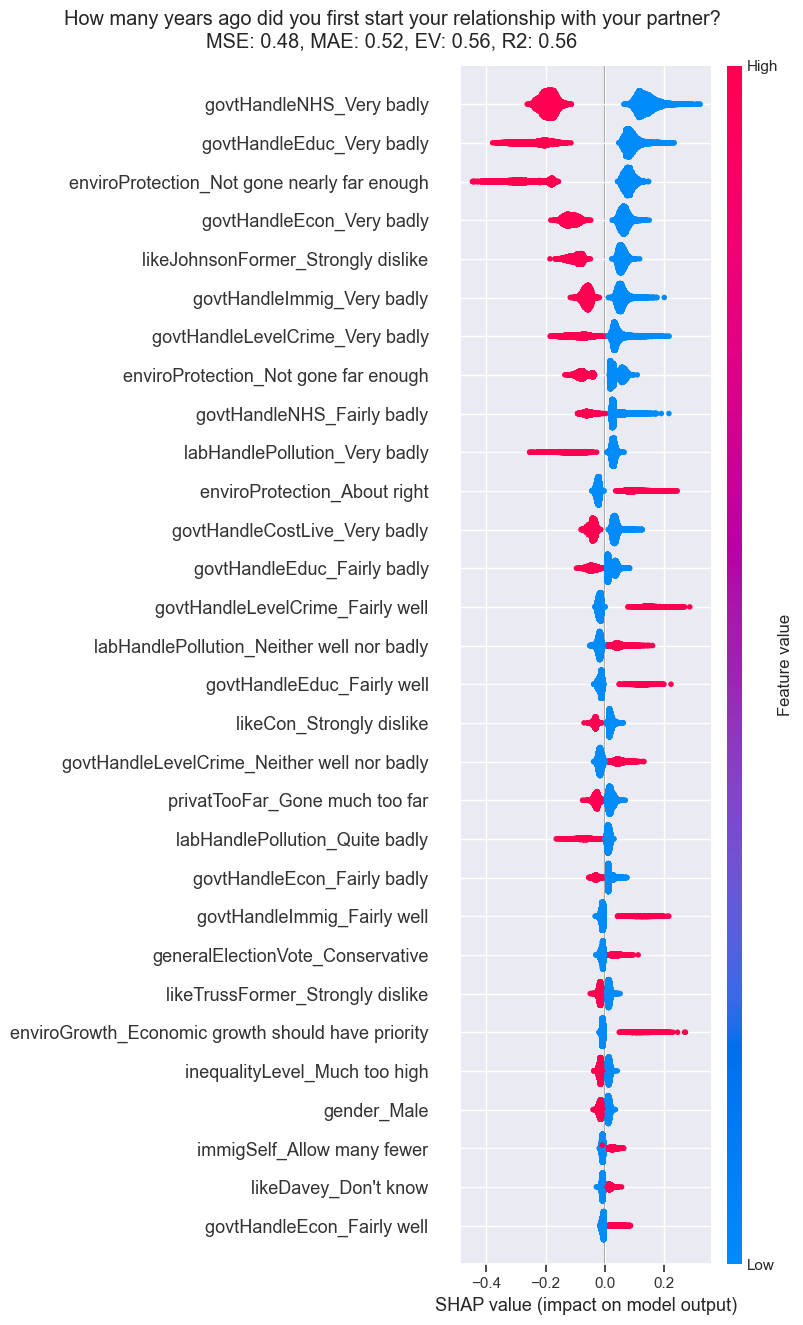

In [24]:
# govtHandlePollution
name="govtHandlePollution"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for conLookAfterPublic r p N 
 
 govtHandlePollution 
 0.490000 
 0.00 
 19243 
 
 
 inequalityLevel 
 0.440000 
 0.00 
 19280 
 
 
 partyId_Conservative 
 0.440000 
 0.00 
 20889 
 
 
 p_past_vote_2019_Conservative 
 0.430000 
 0.00 
 20889 
 
 
 conLookAfterYoung_Fairly closely 
 0.430000 
 0.00 
 20889 
 
 
 generalElectionVote_Conservative 
 0.430000 
 0.00 
 20889 
 
 
 p_past_vote_2017_Conservative 
 0.410000 
 0.00 
 20889 
 
 
 conLookAfterWC_Fairly closely 
 0.410000 
 0.00 
 20889 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.390000 
 0.00 
 20889 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.370000 
 0.00 
 20889 
 
 
 conLookAfterBA_Fairly closely 
 0.360000 
 0.00 
 20889 
 
 
 euID_The leave side 
 0.350000 
 0.00 
 20889 
 
 
 ptvCon_Very likely 
 0.350000 
 0.00 
 20889 
 
 
 bestOnMII_Conservative 
 0.350000 
 0.00 
 20889 
 
 
 p_past_vote_2015_Conservative 
 0.330000 
 0.00 
 20889 
 
 
 ptvLab_Very unlikely 
 0.320000 
 0.00 
 20889 
 
 
 govtHandleEcon_Fairly well 
 0.310000 
 0.00 
 20889 
 
 
 govtHandleNHS_Neither well nor badly 
 0.290000 
 0.00 
 20889 
 
 
 cutsTooFarNational_About right 
 0.290000 
 0.00 
 20889 
 
 
 inequalityLevel_About right 
 0.290000 
 0.00 
 20889 
 
 Top 20 negative (spearman) correlations for conLookAfterPublic r p N 
 
 conLookAfterYoung_Not at all closely 
 -0.500000 
 0.00 
 20889 
 
 
 ptvCon_Very unlikely 
 -0.490000 
 0.00 
 20889 
 
 
 govtHandleNHS_Very badly 
 -0.490000 
 0.00 
 20889 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.480000 
 0.00 
 20889 
 
 
 likeCon_Strongly dislike 
 -0.470000 
 0.00 
 20889 
 
 
 conLookAfterWC_Not at all closely 
 -0.460000 
 0.00 
 20889 
 
 
 govtHandleEcon_Very badly 
 -0.450000 
 0.00 
 20889 
 
 
 govtHandleCostLive_Very badly 
 -0.440000 
 0.00 
 20889 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.430000 
 0.00 
 20889 
 
 
 govtHandleEduc_Very badly 
 -0.420000 
 0.00 
 20889 
 
 
 govtHandlePollution_Very badly 
 -0.420000 
 0.00 
 20889 
 
 
 cutsTooFarNational_Gone much too far 
 -0.420000 
 0.00 
 20889 
 
 
 inequalityLevel_Much too high 
 -0.410000 
 0.00 
 20889 
 
 
 conLookAfterBA_Not at all closely 
 -0.410000 
 0.00 
 20889 
 
 
 conLookAfterNoEducated_Not at all closely 
 -0.400000 
 0.00 
 20889 
 
 
 privatTooFar_Gone much too far 
 -0.380000 
 0.00 
 20889 
 
 
 pubPrivEfficient 
 -0.370000 
 0.00 
 18633 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.370000 
 0.00 
 20889 
 
 
 lr4_Strongly agree 
 -0.360000 
 0.00 
 20889 
 
 
 p_past_vote_2019_Labour 
 -0.360000 
 0.00 
 20889

MSE: 0.36, MAE: 0.44, EV: 0.56, R2: 0.56


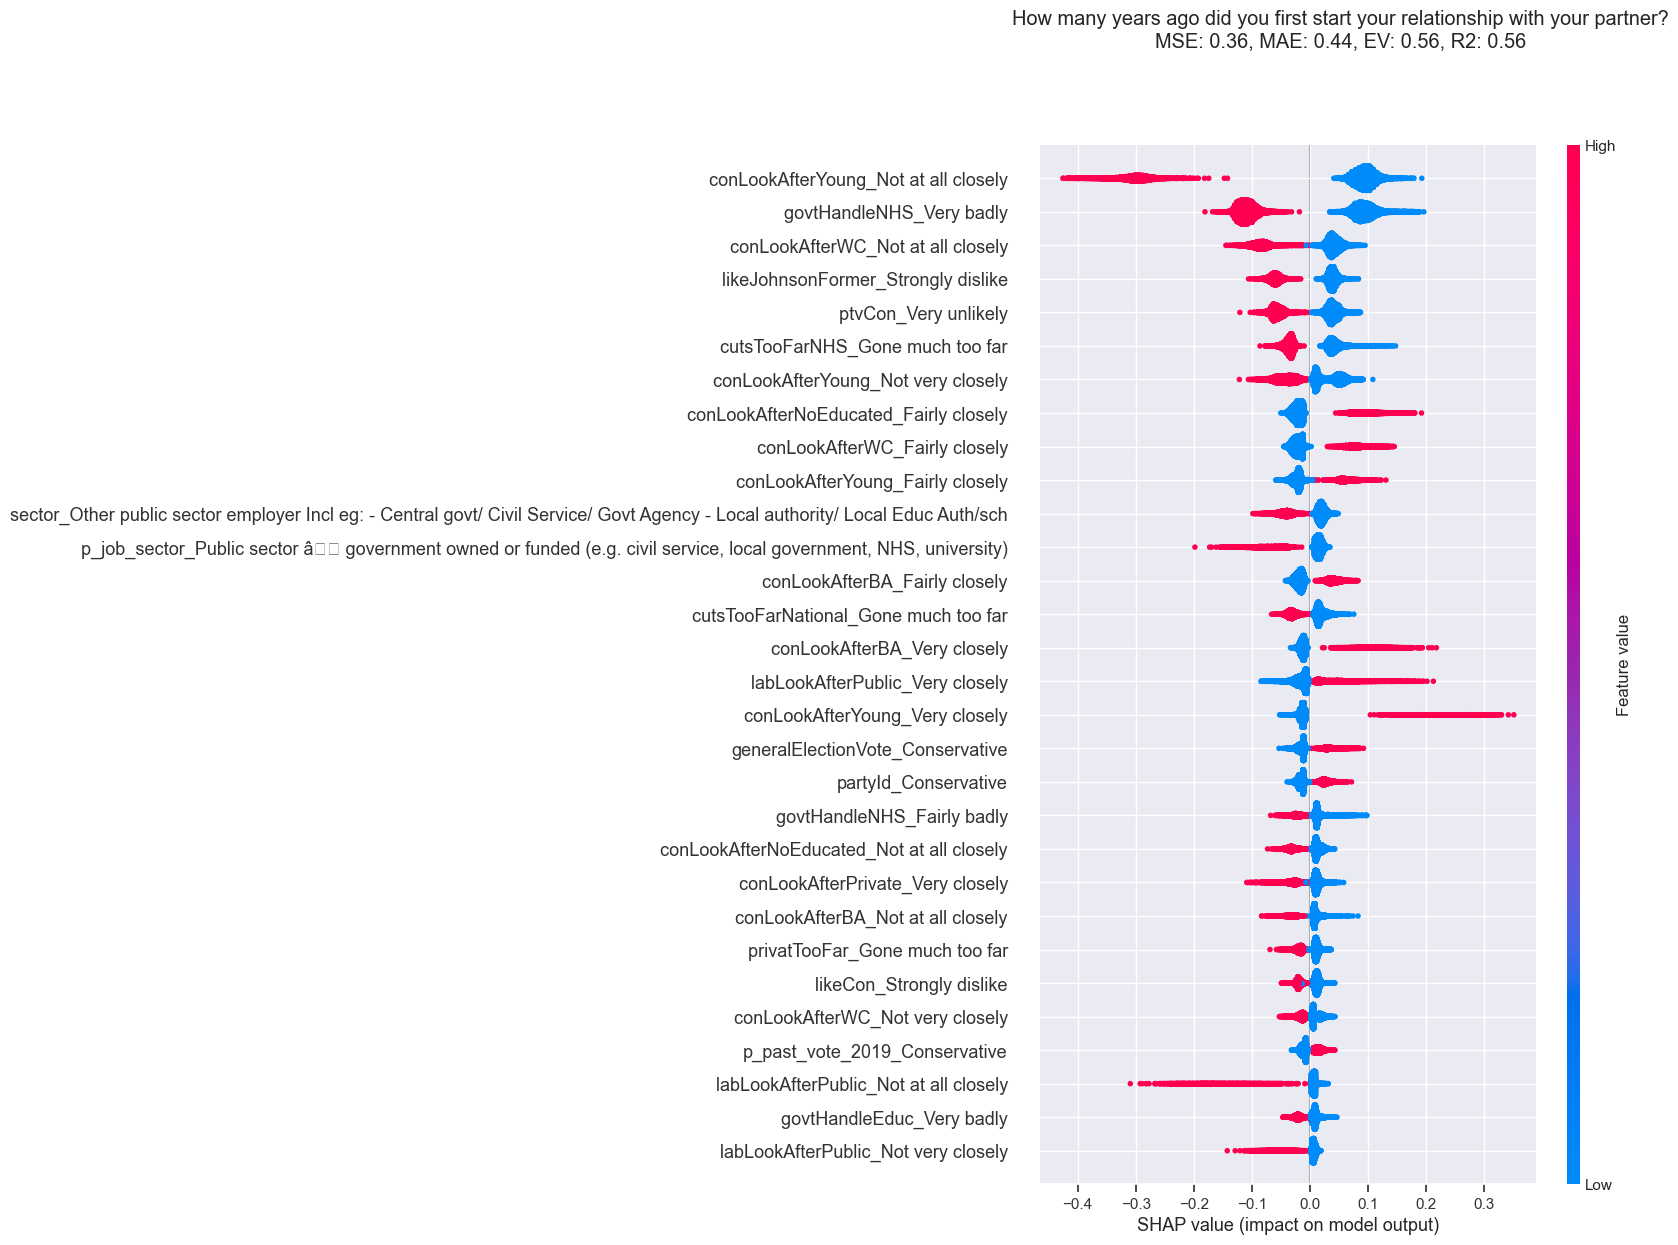

In [25]:
# conLookAfterPublic
name="conLookAfterPublic"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for conLookAfterPrivate r p N 
 
 conLookAfterMC_Very closely 
 0.250000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Very closely 
 0.240000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Very closely 
 0.200000 
 0.00 
 20107 
 
 
 labLookAfterWC_Very closely 
 0.160000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Very closely 
 0.130000 
 0.00 
 20107 
 
 
 conLookAfterRetired_Very closely 
 0.130000 
 0.00 
 20107 
 
 
 discrimTrans 
 0.120000 
 0.00 
 18253 
 
 
 conLookAfterNoEducated_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 gender_Female 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterYoung_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 generalElectionVote_Labour 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterEducated_Fairly closely 
 0.100000 
 0.00 
 20107 
 
 
 labHandleCostLive_Fairly well 
 0.100000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Fairly closely 
 0.100000 
 0.00 
 20107 
 
 
 discrimGay 
 0.100000 
 0.00 
 18618 
 
 
 euID_The remain side 
 0.100000 
 0.00 
 20107 
 
 
 partyId_Labour 
 0.100000 
 0.00 
 20107 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.100000 
 0.00 
 20107 
 
 
 labHandleEduc_Fairly well 
 0.090000 
 0.00 
 20107 
 
 Top 20 negative (spearman) correlations for conLookAfterPrivate r p N 
 
 conLookAfterMC_Not very closely 
 -0.170000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Not at all closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Not at all closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Not very closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterMC_Not at all closely 
 -0.150000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Not very closely 
 -0.140000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Not at all closely 
 -0.140000 
 0.00 
 20107 
 
 
 labLookAfterMC_Not at all closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterPrivate_Not at all closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Not very closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Not at all closely 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Not very closely 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterWC_Not very closely 
 -0.120000 
 0.00 
 20107 
 
 
 labHandleImmig_Very badly 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterWC_Not at all closely 
 -0.120000 
 0.00 
 20107 
 
 
 gender_Male 
 -0.110000 
 0.00 
 20107 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.110000 
 0.00 
 20107 
 
 
 labLookAfterYoung_Not at all closely 
 -0.110000 
 0.00 
 20107 
 
 
 likeGrn_Strongly dislike 
 -0.110000 
 0.00 
 20107 
 
 
 labHandleCostLive_Very badly 
 -0.110000 
 0.00 
 20107

MSE: 0.52, MAE: 0.56, EV: 0.28, R2: 0.28


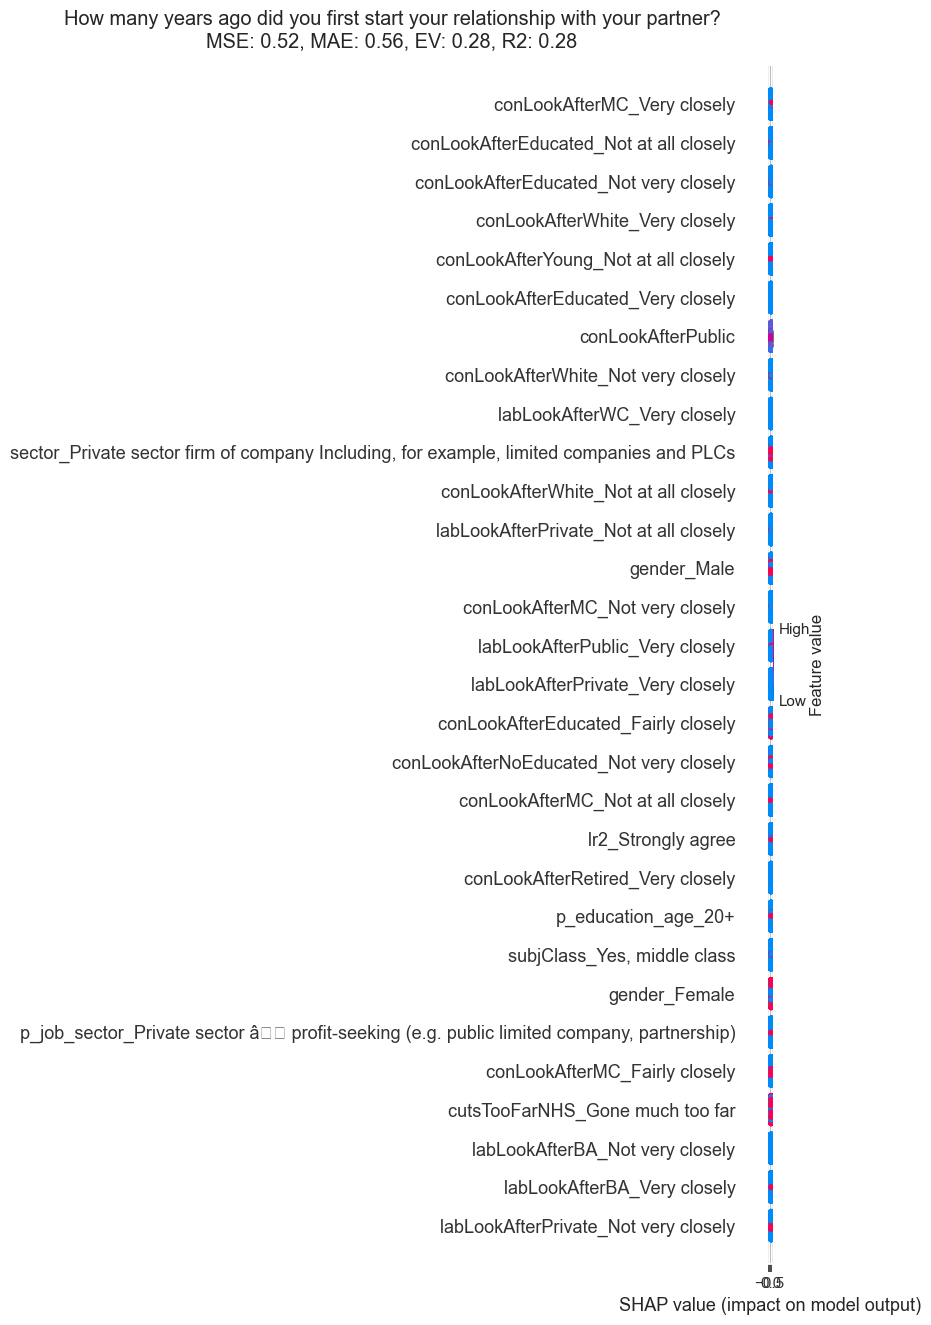

In [26]:
# conLookAfterPrivate
name="conLookAfterPrivate"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for statusAreaEdu r p N 
 
 statusAreaSpaces_Agree 
 0.270000 
 0.00 
 4923 
 
 
 changeSchools 
 0.270000 
 0.00 
 4566 
 
 
 statusAreaSpaces_Strongly agree 
 0.220000 
 0.00 
 4923 
 
 
 statusAreaShops_Strongly agree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaCrime_Disagree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Disagree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaShops_Agree 
 0.170000 
 0.00 
 4923 
 
 
 changeSchools_Staying about the same 
 0.160000 
 0.00 
 4923 
 
 
 statusActivities2_1_Yes 
 0.150000 
 0.00 
 4923 
 
 
 monarch_Strongly agree 
 0.140000 
 0.00 
 4923 
 
 
 efficacyPolCare_Disagree 
 0.140000 
 0.00 
 4923 
 
 
 goodConductLocals_Conducted fairly 
 0.140000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Strongly disagree 
 0.130000 
 0.00 
 4923 
 
 
 p_past_vote_2015_Conservative 
 0.130000 
 0.00 
 4923 
 
 
 britishPride_Strongly agree 
 0.130000 
 0.00 
 4923 
 
 
 govtHandleEduc_Fairly well 
 0.130000 
 0.00 
 4923 
 
 
 conLookAfterPublic 
 0.130000 
 0.00 
 4239 
 
 
 govtHandlePollution 
 0.130000 
 0.00 
 4441 
 
 
 ptvCon_Very likely 
 0.130000 
 0.00 
 4923 
 
 
 statusAreaCrime_Strongly disagree 
 0.120000 
 0.00 
 4923 
 
 Top 20 negative (spearman) correlations for statusAreaEdu r p N 
 
 changeSchools_Getting a lot worse 
 -0.230000 
 0.00 
 4923 
 
 
 statusAreaSpaces_Disagree 
 -0.210000 
 0.00 
 4923 
 
 
 statusAreaSpaces_Strongly disagree 
 -0.200000 
 0.00 
 4923 
 
 
 trustMPs_No trust 
 -0.190000 
 0.00 
 4923 
 
 
 govtHandleEduc_Very badly 
 -0.180000 
 0.00 
 4923 
 
 
 likeSunak_Strongly dislike 
 -0.170000 
 0.00 
 4923 
 
 
 govtHandleLevelCrime_Very badly 
 -0.160000 
 0.00 
 4923 
 
 
 statusAreaShops_Strongly disagree 
 -0.150000 
 0.00 
 4923 
 
 
 lr4_Strongly agree 
 -0.150000 
 0.00 
 4923 
 
 
 govtHandleEcon_Very badly 
 -0.150000 
 0.00 
 4923 
 
 
 conLookAfterWC_Not at all closely 
 -0.150000 
 0.00 
 4923 
 
 
 efficacyPolCare_Strongly agree 
 -0.150000 
 0.00 
 4923 
 
 
 govtHandleCostLive_Very badly 
 -0.140000 
 0.00 
 4923 
 
 
 statusActivities2_1_No 
 -0.140000 
 0.00 
 4923 
 
 
 govtHandlePollution_Very badly 
 -0.140000 
 0.00 
 4923 
 
 
 monarch_Strongly disagree 
 -0.130000 
 0.00 
 4923 
 
 
 handleUkraine_Very badly 
 -0.130000 
 0.00 
 4923 
 
 
 conLookAfterYoung_Not at all closely 
 -0.130000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Agree 
 -0.130000 
 0.00 
 4923 
 
 
 statusAreaShops_Disagree 
 -0.130000 
 0.00 
 4923

MSE: 0.68, MAE: 0.64, EV: 0.24, R2: 0.24


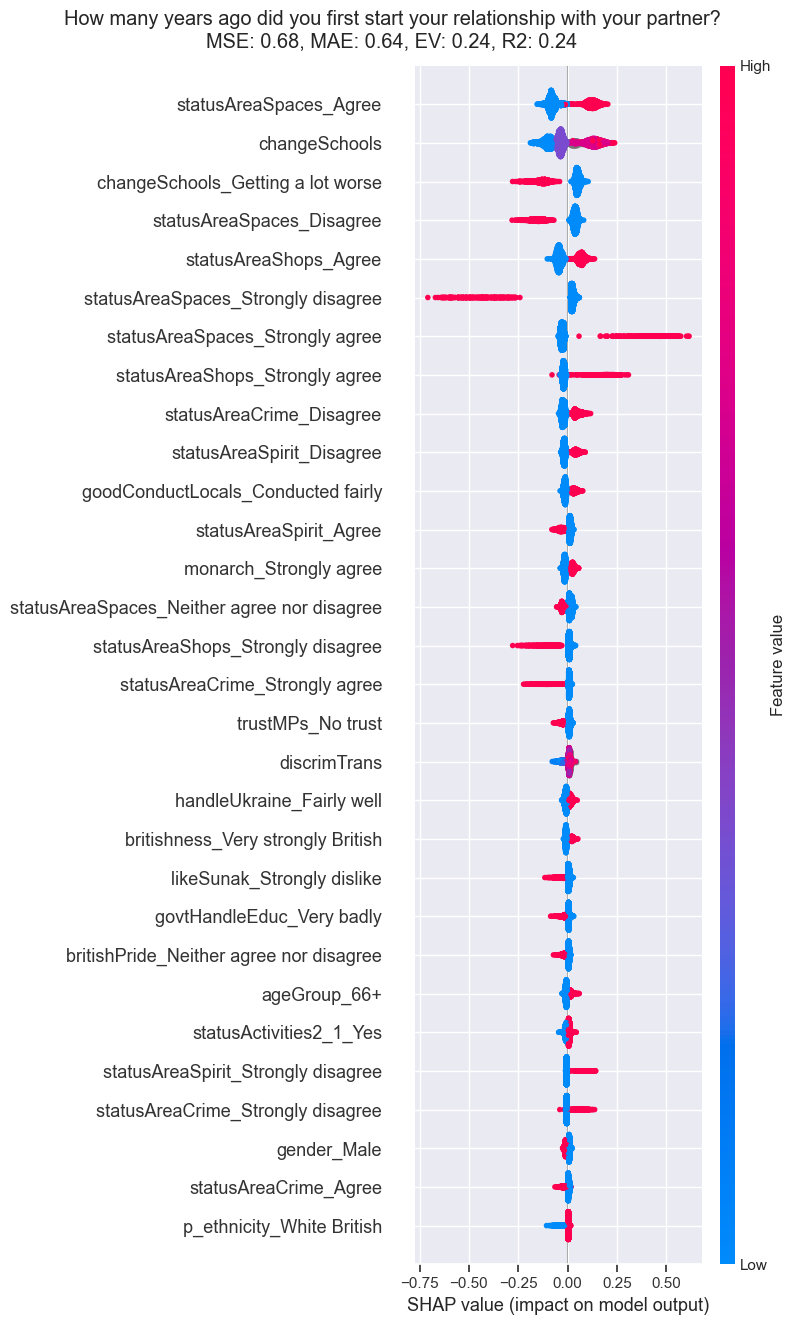

In [27]:
# statusAreaEdu
name="statusAreaEdu"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for cwTrans r p N 
 
 discrimTrans 
 0.390000 
 0.00 
 19698 
 
 
 discrimGay 
 0.340000 
 0.00 
 20081 
 
 
 likeCorbynFormer 
 0.340000 
 0.00 
 21880 
 
 
 cwParents_Strongly agree 
 0.260000 
 0.00 
 22844 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.250000 
 0.00 
 22844 
 
 
 cwParents_Agree 
 0.250000 
 0.00 
 22844 
 
 
 euID_The remain side 
 0.230000 
 0.00 
 22844 
 
 
 cwAuthors_Agree 
 0.230000 
 0.00 
 22844 
 
 
 discrimTrans_A lot of discrimination against 
 0.230000 
 0.00 
 22844 
 
 
 ageGroup_18-25 
 0.220000 
 0.00 
 22844 
 
 
 p_past_vote_2019_Labour 
 0.210000 
 0.00 
 22844 
 
 
 cwAuthors_Strongly agree 
 0.200000 
 0.00 
 22844 
 
 
 generalElectionVote_Labour 
 0.200000 
 0.00 
 22844 
 
 
 conLookAfterBA_Not at all closely 
 0.190000 
 0.00 
 22844 
 
 
 al1_Strongly disagree 
 0.180000 
 0.00 
 22844 
 
 
 cwStatues_Disagree 
 0.180000 
 0.00 
 22844 
 
 
 partyId_Labour 
 0.180000 
 0.00 
 22844 
 
 
 cwLanguage_Neither agree nor disagree 
 0.180000 
 0.00 
 22844 
 
 
 labHandleImmig_Fairly well 
 0.170000 
 0.00 
 22844 
 
 
 cwStatues_Neither agree nor disagree 
 0.170000 
 0.00 
 22844 
 
 Top 20 negative (spearman) correlations for cwTrans r p N 
 
 cwStatues_Strongly agree 
 -0.370000 
 0.00 
 22844 
 
 
 cwLanguage_Strongly agree 
 -0.360000 
 0.00 
 22844 
 
 
 cwParents_Strongly disagree 
 -0.340000 
 0.00 
 22844 
 
 
 likeCorbynFormer_Strongly dislike 
 -0.310000 
 0.00 
 22844 
 
 
 cwAuthors_Strongly disagree 
 -0.310000 
 0.00 
 22844 
 
 
 labHandleImmig_Very badly 
 -0.310000 
 0.00 
 22844 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.300000 
 0.00 
 22844 
 
 
 p_past_vote_2019_Conservative 
 -0.290000 
 0.00 
 22844 
 
 
 ptvGrn_Very unlikely 
 -0.290000 
 0.00 
 22844 
 
 
 changeImmig_Getting a lot higher 
 -0.290000 
 0.00 
 22844 
 
 
 euID_The leave side 
 -0.280000 
 0.00 
 22844 
 
 
 labHandleEcon_Very badly 
 -0.280000 
 0.00 
 22844 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.270000 
 0.00 
 22844 
 
 
 p_past_vote_2017_Conservative 
 -0.270000 
 0.00 
 22844 
 
 
 p_eurefvote_I voted to leave 
 -0.270000 
 0.00 
 22844 
 
 
 ptvLab_Very unlikely 
 -0.270000 
 0.00 
 22844 
 
 
 labHandleCostLive_Very badly 
 -0.250000 
 0.00 
 22844 
 
 
 immigSelf_Allow many fewer 
 -0.250000 
 0.00 
 22844 
 
 
 al1_Strongly agree 
 -0.240000 
 0.00 
 22844 
 
 
 labHandleLevelCrime_Very badly 
 -0.240000 
 0.00 
 22844

MSE: 0.73, MAE: 0.61, EV: 0.44, R2: 0.44


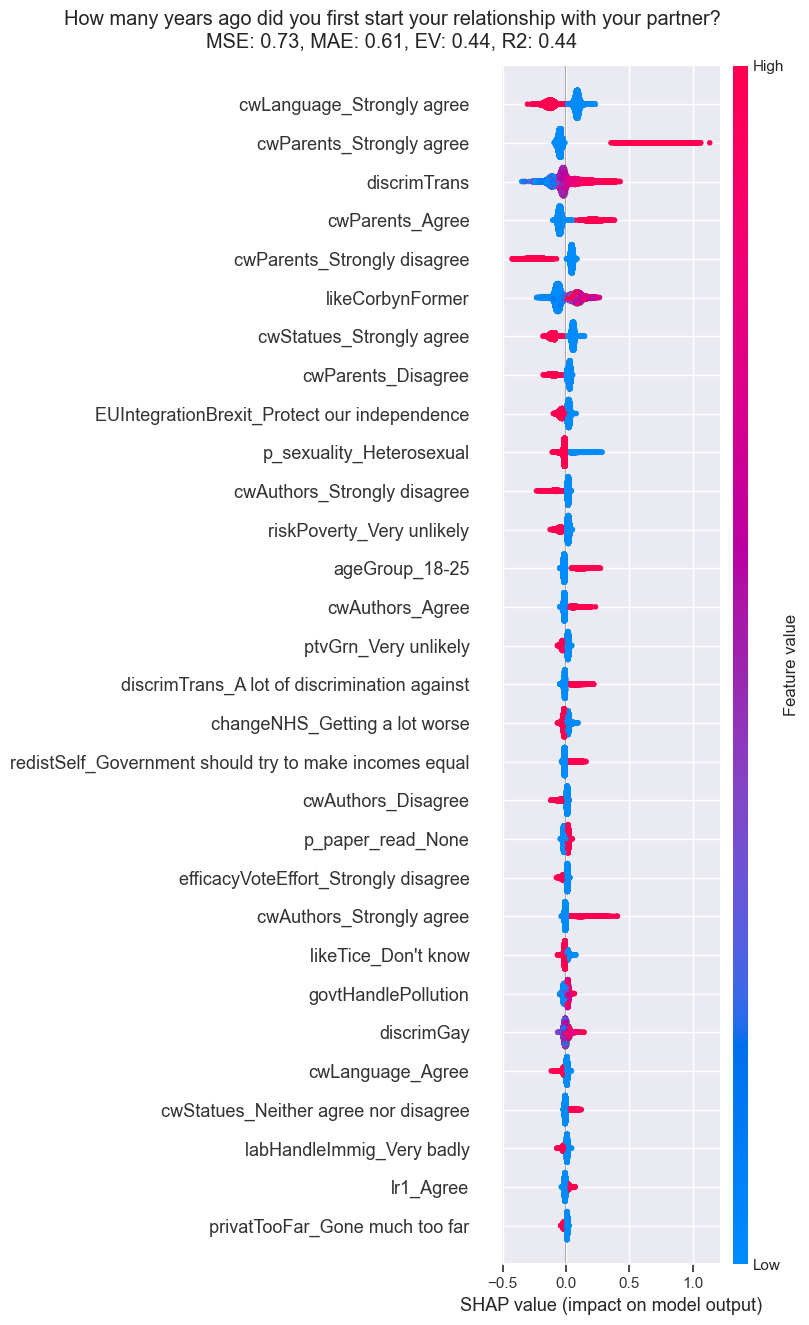

In [28]:
# cwTrans
name="cwTrans"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [29]:
search(BES_Panel,"housing|past|wt")

wt                   30407
enviroGrowth         30407
cwTraining           30407
cwTrans              30407
headHouseholdPast    27008
p_housing            30055
p_past_vote_2010     19009
p_past_vote_2005     17677
p_past_vote_2015     24117
p_past_vote_2017     24301
p_past_vote_2019     25400
dtype: int64

In [30]:
{k: "OTHER" for k in BES_Panel["p_housing"].cat.categories}

{'Own â\x80\x93 outright': 'OTHER',
 'Own â\x80\x93 with a mortgage': 'OTHER',
 'Own (part-own) â\x80\x93 through shared ownership scheme (i.e. pay part mortgage, part rent)': 'OTHER',
 'Rent â\x80\x93 from a private landlord': 'OTHER',
 'Rent â\x80\x93 from my local authority': 'OTHER',
 'Rent â\x80\x93 from a housing association': 'OTHER',
 'Neither â\x80\x93 I live with my parents, family or friends but pay some rent to them': 'OTHER',
 'Neither â\x80\x93 I live rent-free with my parents, family or friends': 'OTHER',
 'Other': 'OTHER'}

In [31]:
ct = round(pd.crosstab(BES_Panel["p_past_vote_2019"],BES_Panel["p_housing"],values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100,2)\
    [BES_Panel["p_housing"].value_counts().index]
ct

p_housing                                 Own â outright  \
p_past_vote_2019                                             
Conservative                                         55.96   
Labour                                               20.51   
Liberal Democrat                                     12.49   
Scottish National Party (SNP)                         3.25   
Plaid Cymru                                           0.52   
United Kingdom Independence Party (UKIP)              0.06   
Green Party                                           2.03   
Other                                                 0.92   
Brexit Party/Reform UK                                2.51   
An independent candidate                              0.40   
Don't know                                            1.34   

p_housing                                 Own â with a mortgage  \
p_past_vote_2019                                                    
Conservative                                                39.27   
Labour                                                      34.07   
Liberal Democrat                                            13.05   
Scottish National Party (SNP)                                3.73   
Plaid Cymru                                                  0.63   
United Kingdom Independence Party (UKIP)                     0.04   
Green Party                                                  3.25   
Other                                                        1.04   
Brexit Party/Reform UK                                       2.16   
An independent candidate                                     0.32   
Don't know                                                   2.44   

p_housing                                 Rent â from a private landlord  \
p_past_vote_2019                                                             
Conservative                                                         29.63   
Labour                                                               45.35   
Liberal Democrat                                                     12.06   
Scottish National Party (SNP)                                         3.69   
Plaid Cymru                                                           0.38   
United Kingdom Independence Party (UKIP)                              0.00   
Green Party                                                           3.05   
Other                                                                 1.01   
Brexit Party/Reform UK                                                1.76   
An independent candidate                                              0.19   
Don't know                                                            2.88   

p_housing                                 Rent â from a housing association  \
p_past_vote_2019                                                                
Conservative                                                            35.75   
Labour                                                                  40.25   
Liberal Democrat                                                         6.07   
Scottish National Party (SNP)                                            6.86   
Plaid Cymru                                                              0.33   
United Kingdom Independence Party (UKIP)                                 0.28   
Green Party                                                              2.19   
Other                                                                    1.01   
Brexit Party/Reform UK                                                   3.93   
An independent candidate                                                 0.18   
Don't know                                                               3.15   

p_housing                                 Rent â from my local authority  \
p_past_vote_2019                                                             
Conservative                                                         3

In [32]:
vote_replace_dict = {'Conservative': 'CON',
 'Labour': 'LAB',
 'Liberal Democrat': 'LD',
 'Scottish National Party (SNP)': 'OTHER',
 'Plaid Cymru': 'OTHER',
 'United Kingdom Independence Party (UKIP)': 'OTHER',
 'Green Party': 'OTHER',
 'Other': 'OTHER',
 'Brexit Party/Reform UK': 'OTHER',
 'An independent candidate': 'OTHER',
 "Don't know": 'OTHER'}

In [33]:
bloc_replace_dict = {'Conservative': 'Auth-Right',
 'Labour': 'Lib-Left',
 'Liberal Democrat': 'Lib-Left',
 'Scottish National Party (SNP)': 'Lib-Left',
 'Plaid Cymru': 'Lib-Left',
 'United Kingdom Independence Party (UKIP)': 'Auth-Right',
 'Green Party': 'Lib-Left',
 'Other': 'OTH',
 'Brexit Party/Reform UK': 'Auth-Right',
 'An independent candidate': 'OTH',
 "Don't know": 'OTH'}

In [34]:
housing_replace_dict = {'Own â\x80\x93 outright': 'OWN',
 'Own â\x80\x93 with a mortgage': 'MORT',
 'Own (part-own) â\x80\x93 through shared ownership scheme (i.e. pay part mortgage, part rent)': np.nan,
 'Rent â\x80\x93 from a private landlord': 'PRIV-RENT',
 'Rent â\x80\x93 from my local authority': 'SOCIAL-RENT',
 'Rent â\x80\x93 from a housing association': 'SOCIAL-RENT',
 'Neither â\x80\x93 I live with my parents, family or friends but pay some rent to them': np.nan,
 'Neither â\x80\x93 I live rent-free with my parents, family or friends': np.nan,
 'Other': np.nan}

In [35]:
ct = round(pd.crosstab(BES_Panel["p_past_vote_2019"].replace(bloc_replace_dict),
                       BES_Panel["p_housing"].replace(housing_replace_dict),
                       values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100,2)\
    [BES_Panel["p_housing"].replace(housing_replace_dict).value_counts().index]
ct

p_housing           OWN   MORT  PRIV-RENT  SOCIAL-RENT
p_past_vote_2019                                      
Auth-Right        58.53  41.48      31.40        40.65
Lib-Left          38.80  54.73      64.53        55.58
OTH                2.67   3.79       4.08         3.77

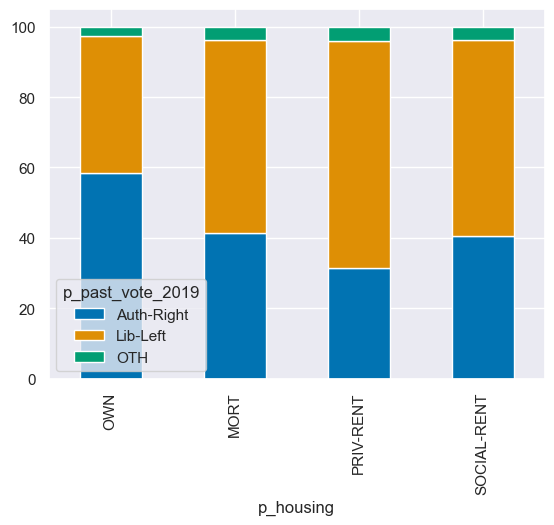

In [36]:
ct.T.reset_index().plot.bar(x='p_housing',stacked=True);

In [37]:
ct = round(pd.crosstab(BES_Panel["p_past_vote_2019"].replace(vote_replace_dict),
                       BES_Panel["p_housing"].replace(housing_replace_dict),
                       values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100,2)\
    [BES_Panel["p_housing"].replace(housing_replace_dict).value_counts().index]
ct

p_housing           OWN   MORT  PRIV-RENT  SOCIAL-RENT
p_past_vote_2019                                      
CON               55.96  39.27      29.63        36.43
LAB               20.51  34.07      45.35        38.67
LD                12.49  13.05      12.06         6.46
OTHER             11.04  13.61      12.95        18.43

In [38]:
ct.T.reset_index().plot.bar(x='p_housing',stacked=True);

In [39]:
search(BES_Panel,"likeStarmer")

likeStarmer    30407
dtype: int64

In [40]:
weighted_value_counts(BES_Panel["likeSunak"],BES_Panel["wt"],normalize=True,percentage=True)

weighted_sample_fraction  raw_sample_size
likeSunak                                                  
9                                     0.02            768.0
Strongly like                         0.02            784.0
1                                     0.06           1959.0
8                                     0.06           2042.0
4                                     0.07           2262.0
2                                     0.08           2532.0
6                                     0.08           2702.0
7                                     0.08           2860.0
Don't know                            0.08           1748.0
3                                     0.09           2581.0
5                                     0.13           4113.0
Strongly dislike                      0.21           6056.0

<AxesSubplot:xlabel='likeSunak'>

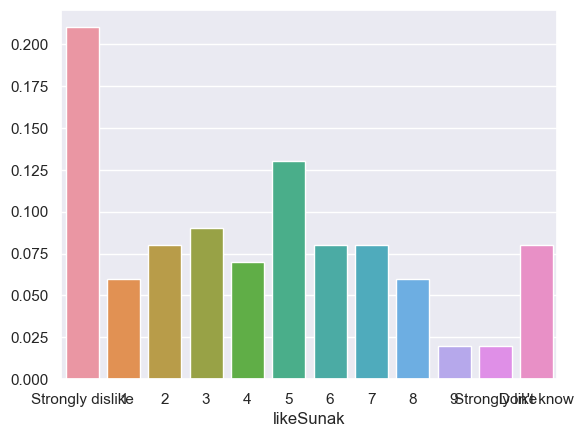

In [41]:
sns.barplot(weighted_value_counts(BES_Panel["likeSunak"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)

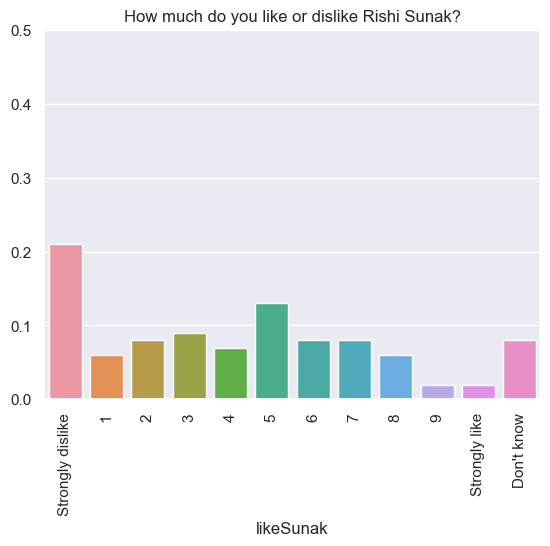

In [42]:
sns.barplot(weighted_value_counts(BES_Panel["likeSunak"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)
plt.xticks(rotation=90);
plt.title("How much do you like or dislike Rishi Sunak?");
plt.ylim([0,.5]);

In [43]:
sns.barplot(weighted_value_counts(BES_Panel["likeJohnsonFormer"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)
plt.xticks(rotation=90);
plt.title("How much do you like or dislike Boris Johnson?");
plt.ylim([0,.5]);

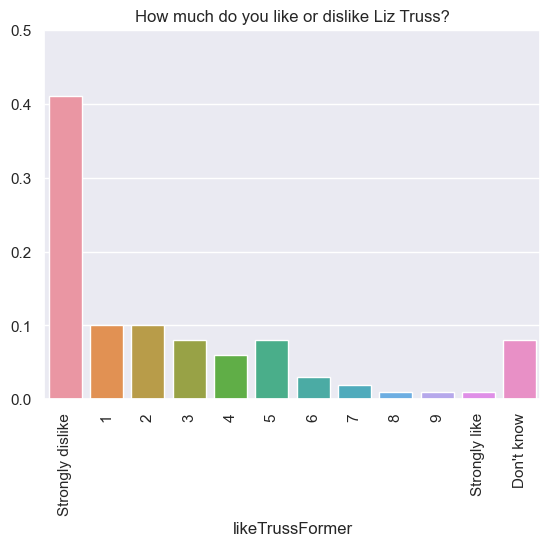

In [44]:
sns.barplot(weighted_value_counts(BES_Panel["likeTrussFormer"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)
plt.xticks(rotation=90);
plt.title("How much do you like or dislike Liz Truss?");
plt.ylim([0,.5]);

In [45]:
sns.barplot(weighted_value_counts(BES_Panel["likeStarmer"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)
plt.xticks(rotation=90);
plt.title("How much do you like or dislike Keir Starmer?");
plt.ylim([0,.5]);

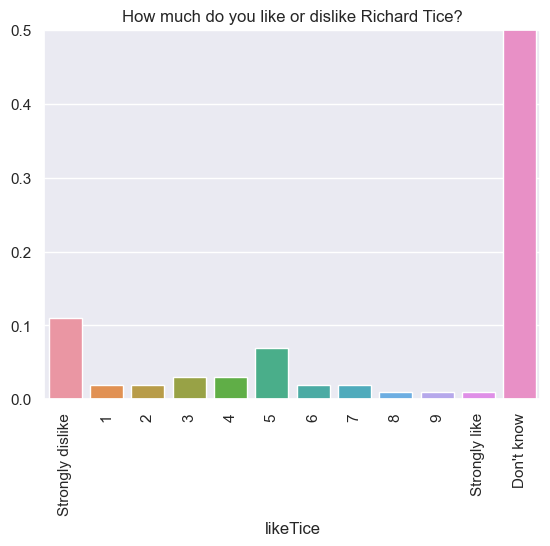

In [46]:
sns.barplot(weighted_value_counts(BES_Panel["likeTice"],BES_Panel["wt"],normalize=True,percentage=True)[['weighted_sample_fraction']].sort_index().T)
plt.xticks(rotation=90);
plt.title("How much do you like or dislike Richard Tice?");
plt.ylim([0,.5]);

In [47]:
search(BES_Panel,"Farage")

Series([], dtype: float64)